In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-delay/features_added.parquet
/kaggle/input/flight-delay/Flight_Delay.parquet


In [2]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler


### Importing Required Libraries

1. **pandas**:  
   - `pandas` is a powerful Python library for data manipulation and analysis. It provides data structures like **DataFrame** and **Series**, which help in handling structured data efficiently.  

2. **US Federal Holiday Calendar**:   
   - This module provides access to the **U.S. Federal Holiday Calendar**, which can be useful for analyzing how flight delays are affected by holidays.  

3. **seaborn**:  
   - `seaborn` is a statistical data visualization library built on top of **matplotlib**. It provides a high-level interface for drawing attractive and informative statistical graphics.  

4. **matplotlib.pyplot**:  
   - `matplotlib` is a widely used plotting library in Python. The `pyplot` module provides functions for creating static, animated, and interactive visualizations.  

5. **plotly.express**:  
   - `plotly.express` is a library for interactive visualizations. It simplifies the creation of animated and interactive plots, such as scatter plots, bar charts, and maps.  

These libraries will be used for **data manipulation, analysis, and visualization** in the flight delay analysis.  


In [3]:
df = pd.read_parquet('/kaggle/input/flight-delay/Flight_Delay.parquet')
df

Year  Month  DayofMonth  FlightDate Marketing_Airline_Network  \
1       2018      1          15  2018-01-15                        UA   
2       2018      1          16  2018-01-16                        UA   
3       2018      1          17  2018-01-17                        UA   
4       2018      1          18  2018-01-18                        UA   
6       2018      1          20  2018-01-20                        UA   
...      ...    ...         ...         ...                       ...   
596671  2023      4          26  2023-04-26                        UA   
596672  2023      4          26  2023-04-26                        UA   
596673  2023      4          26  2023-04-26                        UA   
596674  2023      4          26  2023-04-26                        UA   
596675  2023      4          26  2023-04-26                        UA   

       OriginCityName       DestCityName  CRSDepTime  DepTime  DepDelay  ...  \
1          Newark, NJ     Charleston, SC        1845   1928.0      43.0  ...   
2          Newark, NJ     Charleston, SC        1835   1956.0      81.0  ...   
3          Newark, NJ     Charleston, SC        1835   1836.0       1.0  ...   
4          Newark, NJ     Charleston, SC        1845   1844.0      -1.0  ...   
6          Newark, NJ     Charleston, SC        1835   1829.0      -6.0  ...   
...               ...                ...         ...      ...       ...  ...   
596671    Houston, TX  San Francisco, CA        1234   1230.0      -4.0  ...   
596672    Chicago, IL   Philadelphia, PA        1104   1100.0      -4.0  ...   
596673  Las Vegas, NV        Chicago, IL        1249   1247.0      -2.0  ...   
596674      Miami, FL         Newark, NJ         751    739.0     -12.0  ...   
596675      Tampa, FL    Los Angeles, CA         635    624.0     -11.0  ...   

        CRSElapsedTime  ActualElapsedTime  AirTime  Distance  DistanceGroup  \
1                143.0              141.0    102.0     628.0              3   
2                143.0              131.0    108.0     628.0              3   
3                143.0              138.0    113.0     628.0              3   
4                143.0              134.0     92.0     628.0              3   
6                143.0              117.0     89.0     628.0              3   
...                ...                ...      ...       ...            ...   
596671           258.0              241.0    217.0    1635.0              7   
596672           128.0              108.0     82.0     678.0              3   
596673           220.0              217.0    184.0    1514.0              7   
596674           189.0              178.0    144.0    1085.0              5   
596675           320.0              320.0    301.0    2158.0              9   

        CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
1               41.0           0.0       0.0            0.0                0.0  
2               67.0           0.0       0.0            0.0                2.0  
3                0.0           0.0       0.0            0.0                0.0  
4                0.0           0.0       0.0            0.0                0.0  
6                0.0           0.0       0.0            0.0                0.0  
...              ...           ...       ...            ...                ...  
596671           0.0           0.0       0.0            0.0                0.0  
596672           0.0           0.0       0.0            0.0                0.0  
596673           0.0           0.0       0.0            0.0                0.0  
596674           0.0           0.0       0.0            0.0                0.0  
596675           0.0           0.0       0.0            0.0                0.0  

[30132672 rows x 29 columns]

- **`pd.read_parquet('/kaggle/input/flight-delay/Flight_Delay.parquet')`**  
  This line reads a dataset in **Parquet format** using Pandas.  
  Parquet is a **columnar storage file format** optimized for large datasets, offering efficient **data retrieval** and **compression**.  
  The dataset is stored in the **Kaggle input directory**, commonly used for loading datasets in Kaggle notebooks.  

- **`df`**  
  This command simply **displays the first few rows** of the dataframe.  
  It outputs a preview of the dataset, allowing us to **inspect its structure and contents**.  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30132672 entries, 1 to 596675
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year                       int64  
 1   Month                      int64  
 2   DayofMonth                 int64  
 3   FlightDate                 object 
 4   Marketing_Airline_Network  object 
 5   OriginCityName             object 
 6   DestCityName               object 
 7   CRSDepTime                 int64  
 8   DepTime                    float64
 9   DepDelay                   float64
 10  DepDelayMinutes            float64
 11  TaxiOut                    float64
 12  WheelsOff                  float64
 13  WheelsOn                   float64
 14  TaxiIn                     float64
 15  CRSArrTime                 int64  
 16  ArrTime                    float64
 17  ArrDelay                   float64
 18  ArrDelayMinutes            float64
 19  CRSElapsedTime             float64
 20  ActualE

The `df.info()` command provides a summary of the dataset, including:  

- **Total Entries:** 30,132,672 rows (large dataset).  
- **Index Range:** From 1 to 596,675 (indicating a custom index).  
- **Number of Columns:** 29.  
- **Column Data Types:**  
  - **Integer (`int64`)** – 6 columns (e.g., `Year`, `Month`, `DayofMonth`).  
  - **Float (`float64`)** – 19 columns (e.g., `DepDelay`, `ArrDelay`, `AirTime`).  
  - **Object (`object`)** – 4 columns (e.g., `FlightDate`, `Marketing_Airline_Network`).  
- **Memory Usage:** 6.7+ GB, which suggests a need for optimization when handling large-scale data.  

This summary helps in identifying potential data issues like missing values, incorrect data types, or high memory consumption, which are crucial for preprocessing and analysis.  

In [5]:
df.shape

(30132672, 29)

The `df.shape` command returns the dimensions of the dataset in the form `(rows, columns)`.

- **Rows (30132672)**: The dataset contains **30,132,672** records, representing individual flight data entries.  
- **Columns (29)**: There are **29 features** (variables) in the dataset, including flight date, departure time, delay reasons, and more.



In [6]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'FlightDate',
       'Marketing_Airline_Network', 'OriginCityName', 'DestCityName',
       'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

The `df.columns` attribute returns the list of column names in the dataset. These columns represent different features related to flight delays.  

#### **Key Columns:**  
- **Date & Time Information:** `Year`, `Month`, `DayofMonth`, `FlightDate`, `CRSDepTime`, `DepTime`, `CRSArrTime`, `ArrTime`  
- **Flight Details:** `Marketing_Airline_Network`, `OriginCityName`, `DestCityName`, `Distance`, `DistanceGroup`  
- **Delay Information:** `DepDelay`, `DepDelayMinutes`, `ArrDelay`, `ArrDelayMinutes`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`  
- **Operational Metrics:** `TaxiOut`, `WheelsOff`, `WheelsOn`, `TaxiIn`, `CRSElapsedTime`, `ActualElapsedTime`, `AirTime`  


In [7]:
df.describe()

Year         Month    DayofMonth    CRSDepTime       DepTime  \
count  3.013267e+07  3.013267e+07  3.013267e+07  3.013267e+07  3.013267e+07   
mean   2.020091e+03  6.297564e+00  1.572297e+01  1.322736e+03  1.327245e+03   
std    1.602171e+00  3.487835e+00  8.770224e+00  4.840125e+02  4.983890e+02   
min    2.018000e+03  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.019000e+03  3.000000e+00  8.000000e+00  9.150000e+02  9.160000e+02   
50%    2.020000e+03  6.000000e+00  1.600000e+01  1.315000e+03  1.320000e+03   
75%    2.022000e+03  9.000000e+00  2.300000e+01  1.729000e+03  1.737000e+03   
max    2.023000e+03  1.200000e+01  3.100000e+01  2.359000e+03  2.400000e+03   

           DepDelay  DepDelayMinutes       TaxiOut     WheelsOff  \
count  3.013267e+07     3.013267e+07  3.013267e+07  3.013267e+07   
mean   1.061144e+01     1.429690e+01  1.650212e+01  1.350119e+03   
std    5.198293e+01     5.081470e+01  9.467169e+00  4.998794e+02   
min   -3.420000e+02     0.000000e+00  0.000000e+00  1.000000e+00   
25%   -6.000000e+00     0.000000e+00  1.100000e+01  9.310000e+02   
50%   -3.000000e+00     0.000000e+00  1.400000e+01  1.333000e+03   
75%    3.000000e+00     3.000000e+00  1.900000e+01  1.751000e+03   
max    7.223000e+03     7.223000e+03  1.439000e+03  2.400000e+03   

           WheelsOn  ...  CRSElapsedTime  ActualElapsedTime       AirTime  \
count  3.013267e+07  ...    3.013267e+07       3.013267e+07  3.013267e+07   
mean   1.456780e+03  ...    1.388678e+02       1.320092e+02  1.080538e+02   
std    5.249568e+02  ...    7.096150e+01       7.061227e+01  6.872621e+01   
min    1.000000e+00  ...   -2.920000e+02       4.000000e+00 -1.412000e+03   
25%    1.046000e+03  ...    8.800000e+01       8.100000e+01  5.800000e+01   
50%    1.456000e+03  ...    1.200000e+02       1.140000e+02  9.000000e+01   
75%    1.903000e+03  ...    1.690000e+02       1.620000e+02  1.370000e+02   
max    2.400000e+03  ...    1.645000e+03       1.604000e+03  1.557000e+03   

           Distance  DistanceGroup  CarrierDelay  WeatherDelay      NASDelay  \
count  3.013267e+07   3.013267e+07  3.013267e+07  3.013267e+07  3.013267e+07   
mean   7.764743e+02   3.580303e+00  5.050473e+00  8.417200e-01  2.994112e+00   
std    5.823315e+02   2.291205e+00  3.370024e+01  1.509353e+01  1.664252e+01   
min    1.600000e+01   1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.520000e+02   2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    6.200000e+02   3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    1.011000e+03   5.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    5.812000e+03   1.100000e+01  7.232000e+03  2.900000e+03  1.848000e+03   

       SecurityDelay  LateAircraftDelay  
count   3.013267e+07       3.013267e+07  
mean    2.741088e-02       5.522570e+00  
std     1.650743e+00       2.751737e+01  
min     0.000000e+00       0.000000e+00  
25%     0.000000e+00       0.000000e+00  
50%     0.000000e+00       0.000000e+00  
75%     0.000000e+00       0.000000e+00  
max     1.460000e+03       2.962000e+03  

[8 rows x 25 columns]

The command `df.describe()` provides a summary of the numerical columns in the dataset. It outputs various statistical metrics that help understand the distribution and range of the data. The main metrics include:

- **count**: The total number of non-null entries in each column.
- **mean**: The average value of each column.
- **std**: The standard deviation, which measures the spread or dispersion of the data.
- **min**: The minimum value in each column.
- **25%**: The 25th percentile (first quartile), where 25% of the values fall below this number.
- **50%**: The median (50th percentile), where 50% of the values fall below this number.
- **75%**: The 75th percentile (third quartile), where 75% of the values fall below this number.
- **max**: The maximum value in each column.

In [8]:
# checking missing value of each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Year                         0.0
Month                        0.0
DayofMonth                   0.0
FlightDate                   0.0
Marketing_Airline_Network    0.0
OriginCityName               0.0
DestCityName                 0.0
CRSDepTime                   0.0
DepTime                      0.0
DepDelay                     0.0
DepDelayMinutes              0.0
TaxiOut                      0.0
WheelsOff                    0.0
WheelsOn                     0.0
TaxiIn                       0.0
CRSArrTime                   0.0
ArrTime                      0.0
ArrDelay                     0.0
ArrDelayMinutes              0.0
CRSElapsedTime               0.0
ActualElapsedTime            0.0
AirTime                      0.0
Distance                     0.0
DistanceGroup                0.0
CarrierDelay                 0.0
WeatherDelay                 0.0
NASDelay                     0.0
SecurityDelay                0.0
LateAircraftDelay            0.0
dtype: float64


To assess the completeness of the dataset, we calculate the percentage of missing values for each column. This is done by using the `isnull().sum()` function, which counts the number of missing values in each column, and then dividing by the total number of rows to get the percentage.

The results show that **all columns** in the dataset have **0% missing values**, indicating that there is no missing data in any of the columns.

This is important as it means we can proceed with further analysis without needing to handle missing values at this stage.


In [9]:
# Convert 'flight_date' column to datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Filter data from 2020-04 to 2023-04
df_filtered = df[(df['FlightDate'] >= '2020-04-01') & (df['FlightDate'] <= '2023-04-30')]
df_filtered


Year  Month  DayofMonth FlightDate Marketing_Airline_Network  \
0       2020     10          15 2020-10-15                        UA   
1       2020     10          23 2020-10-23                        UA   
2       2020     10          20 2020-10-20                        UA   
3       2020     10          20 2020-10-20                        UA   
4       2020     10          17 2020-10-17                        UA   
...      ...    ...         ...        ...                       ...   
596671  2023      4          26 2023-04-26                        UA   
596672  2023      4          26 2023-04-26                        UA   
596673  2023      4          26 2023-04-26                        UA   
596674  2023      4          26 2023-04-26                        UA   
596675  2023      4          26 2023-04-26                        UA   

         OriginCityName            DestCityName  CRSDepTime  DepTime  \
0         Charlotte, NC          Washington, DC        1445   1444.0   
1        Pittsburgh, PA             Houston, TX        1615   1611.0   
2        Louisville, KY             Houston, TX         700    700.0   
3       Little Rock, AR             Houston, TX         710    709.0   
4        Washington, DC  Sarasota/Bradenton, FL        1030   1153.0   
...                 ...                     ...         ...      ...   
596671      Houston, TX       San Francisco, CA        1234   1230.0   
596672      Chicago, IL        Philadelphia, PA        1104   1100.0   
596673    Las Vegas, NV             Chicago, IL        1249   1247.0   
596674        Miami, FL              Newark, NJ         751    739.0   
596675        Tampa, FL         Los Angeles, CA         635    624.0   

        DepDelay  ...  CRSElapsedTime  ActualElapsedTime  AirTime  Distance  \
0           -1.0  ...            96.0              116.0     55.0     322.0   
1           -4.0  ...           193.0              213.0    197.0    1117.0   
2            0.0  ...           150.0              182.0    148.0     788.0   
3           -1.0  ...            99.0              129.0     62.0     374.0   
4           83.0  ...           149.0              136.0    124.0     849.0   
...          ...  ...             ...                ...      ...       ...   
596671      -4.0  ...           258.0              241.0    217.0    1635.0   
596672      -4.0  ...           128.0              108.0     82.0     678.0   
596673      -2.0  ...           220.0              217.0    184.0    1514.0   
596674     -12.0  ...           189.0              178.0    144.0    1085.0   
596675     -11.0  ...           320.0              320.0    301.0    2158.0   

        DistanceGroup  CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  \
0                   2           0.0           0.0      19.0            0.0   
1                   5           0.0           0.0      16.0            0.0   
2                   4           0.0           0.0      32.0            0.0   
3                   2           0.0           0.0      29.0            0.0   
4                   4           0.0           0.0      70.0            0.0   
...               ...           ...           ...       ...            ...   
596671              7           0.0           0.0       0.0            0.0   
596672              3           0.0           0.0       0.0            0.0   
596673              7           0.0           0.0       0.0            0.0   
596674              5           0.0           0.0       0.0            0.0   
596675              9           0.0           0.0       0.0            0.0   

        LateAircraftDelay  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
...                   ...  
596671                0.0  
596672                0.0  
596673                0.0  
596674                0.0  
596675                0.0  

[15369203 rows x 29 columns]

1. **Convert 'FlightDate' to Datetime**  
   The **'FlightDate'** column is converted to the **datetime** format using `pd.to_datetime()`. This allows for easier manipulation of date-related data, such as filtering, sorting, and performing time-based operations.

2. **Filter Data for a Specific Date Range**  
   The dataset is filtered to include only flights between **April 1, 2020** and **April 30, 2023**.  
   - The condition **(df['FlightDate'] >= '2020-04-01') & (df['FlightDate'] <= '2023-04-30')** is applied to create a subset of the original dataframe, which is stored in the `df_filtered` variable.
   - This step helps to focus on a specific time period relevant for further analysis.


In [10]:
# Select the specified columns
columns_to_select = [
    'FlightDate','Marketing_Airline_Network','OriginCityName', 'DestCityName', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
    'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'CRSElapsedTime', 
    'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
    'SecurityDelay', 'LateAircraftDelay'
]

df_selected = df_filtered[columns_to_select]

# Display the filtered data
df_selected

FlightDate Marketing_Airline_Network   OriginCityName  \
0      2020-10-15                        UA    Charlotte, NC   
1      2020-10-23                        UA   Pittsburgh, PA   
2      2020-10-20                        UA   Louisville, KY   
3      2020-10-20                        UA  Little Rock, AR   
4      2020-10-17                        UA   Washington, DC   
...           ...                       ...              ...   
596671 2023-04-26                        UA      Houston, TX   
596672 2023-04-26                        UA      Chicago, IL   
596673 2023-04-26                        UA    Las Vegas, NV   
596674 2023-04-26                        UA        Miami, FL   
596675 2023-04-26                        UA        Tampa, FL   

                  DestCityName  CRSDepTime  DepTime  DepDelay  \
0               Washington, DC        1445   1444.0      -1.0   
1                  Houston, TX        1615   1611.0      -4.0   
2                  Houston, TX         700    700.0       0.0   
3                  Houston, TX         710    709.0      -1.0   
4       Sarasota/Bradenton, FL        1030   1153.0      83.0   
...                        ...         ...      ...       ...   
596671       San Francisco, CA        1234   1230.0      -4.0   
596672        Philadelphia, PA        1104   1100.0      -4.0   
596673             Chicago, IL        1249   1247.0      -2.0   
596674              Newark, NJ         751    739.0     -12.0   
596675         Los Angeles, CA         635    624.0     -11.0   

        DepDelayMinutes  TaxiOut  TaxiIn  ...  CRSElapsedTime  \
0                   0.0     53.0     8.0  ...            96.0   
1                   0.0      8.0     8.0  ...           193.0   
2                   0.0     29.0     5.0  ...           150.0   
3                   0.0     59.0     8.0  ...            99.0   
4                  83.0     10.0     2.0  ...           149.0   
...                 ...      ...     ...  ...             ...   
596671              0.0     19.0     5.0  ...           258.0   
596672              0.0     18.0     8.0  ...           128.0   
596673              0.0     17.0    16.0  ...           220.0   
596674              0.0     14.0    20.0  ...           189.0   
596675              0.0     11.0     8.0  ...           320.0   

        ActualElapsedTime  AirTime  Distance  DistanceGroup  CarrierDelay  \
0                   116.0     55.0     322.0              2           0.0   
1                   213.0    197.0    1117.0              5           0.0   
2                   182.0    148.0     788.0              4           0.0   
3                   129.0     62.0     374.0              2           0.0   
4                   136.0    124.0     849.0              4           0.0   
...                   ...      ...       ...            ...           ...   
596671              241.0    217.0    1635.0              7           0.0   
596672              108.0     82.0     678.0              3           0.0   
596673              217.0    184.0    1514.0              7           0.0   
596674              178.0    144.0    1085.0              5           0.0   
596675              320.0    301.0    2158.0              9           0.0   

        WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0                0.0      19.0            0.0                0.0  
1                0.0      16.0            0.0                0.0  
2                0.0      32.0            0.0                0.0  
3                0.0      29.0            0.0                0.0  
4                0.0      70.0            0.0                0.0  
...              ...       ...            ...                ...  
596671           0.0       0.0            0.0                0.0  
596672           0.0       0.0            0.0                0.0  
596673           0.0       0.0            0.0                0.0  
596674           0.0       0.0            0.0                0.0  
596675        

1. **Column Selection**  
   A subset of columns is selected from the filtered dataset to focus on the most relevant variables. This includes columns related to flight date, airline, departure and arrival times, delays, and flight duration.

2. **Creating a New DataFrame**  
   The selected columns are stored in a new dataframe, **`df_selected`**, which now contains only the chosen variables for further analysis.

3. **Display the Selected Data**  
   The **`df_selected`** dataframe is displayed, showing the data for the specified columns, making it easier to work with a more focused set of information.

In [11]:

#df_selected.to_csv('/kaggle/working/Flight_Delay_filtered.csv', index=False)

The filtered dataframe, **df_selected**, is saved as a **CSV file** named **'Flight_Delay_filtered.csv'** in the working directory.  
- **`index=False`** ensures that the row indices are not included in the saved file, keeping only the data columns.


In [12]:
df_selected.shape


(15369203, 24)

The `df_selected.shape` command is used to display the dimensions of the filtered dataset, showing the number of rows and columns. This helps to verify how many records and features are present after filtering the data.

In [13]:
df_selected.columns

Index(['FlightDate', 'Marketing_Airline_Network', 'OriginCityName',
       'DestCityName', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'TaxiOut', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:

df_renamed= df_selected.copy()

# Now rename the columns
df_renamed.rename(columns={
    'FlightDate': 'date',
    'Marketing_Airline_Network': 'airline',
    'OriginCityName': 'origin',
    'DestCityName': 'destination',
    'CRSDepTime': 'sched_dep_time',
    'DepTime': 'actual_dep_time',
    'DepDelay': 'dep_delay',
    'DepDelayMinutes': 'dep_delay_min',
    'TaxiOut': 'taxi_out',
    'TaxiIn': 'taxi_in',
    'CRSArrTime': 'sched_arr_time',
    'ArrTime': 'actual_arr_time',
    'ArrDelay': 'arr_delay',
    'ArrDelayMinutes': 'arr_delay_min',
    'CRSElapsedTime': 'sched_duration',
    'ActualElapsedTime': 'actual_duration',
    'AirTime': 'air_time',
    'Distance': 'dist',
    'DistanceGroup': 'dist_group',
    'CarrierDelay': 'carrier_delay',
    'WeatherDelay': 'weather_delay',
    'NASDelay': 'nas_delay',
    'SecurityDelay': 'security_delay',
    'LateAircraftDelay': 'late_aircraft_delay'
}, inplace=True)




1. **Create a Copy of the Data**  
   A copy of the selected dataframe (`df_selected`) is created to preserve the original data before making modifications.  

2. **Rename Columns**  
   The column names are updated to more concise and readable names. For example:  
   - **'FlightDate' → 'date'**  
   - **'Marketing_Airline_Network' → 'airline'**  
   - **'OriginCityName' → 'origin'**  
   - **'DepDelay' → 'dep_delay'**  
   - **'ArrDelayMinutes' → 'arr_delay_min'**  

   This renaming improves clarity and makes it easier to work with the dataset in analysis and modeling.  

In [15]:
df_renamed.shape

(15369203, 24)

In [16]:
# Display the updated columns
print(df_renamed.columns)

Index(['date', 'airline', 'origin', 'destination', 'sched_dep_time',
       'actual_dep_time', 'dep_delay', 'dep_delay_min', 'taxi_out', 'taxi_in',
       'sched_arr_time', 'actual_arr_time', 'arr_delay', 'arr_delay_min',
       'sched_duration', 'actual_duration', 'air_time', 'dist', 'dist_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')


In [17]:
# Get unique values from the 'airline' column
unique_airlines = df_renamed['airline'].unique()

# Display the unique values
print(unique_airlines)

['UA' 'AA' 'HA' 'B6' 'F9' 'DL' 'AS' 'WN' 'NK' 'G4']


- Retrieves all **unique airline names** from the **'airline'** column.  
- The `.unique()` function returns a list of distinct values, helping to identify all airlines present in the dataset.  


In [18]:
# Define a dictionary mapping airline codes to their full names
airline_mapping = {
    'UA': 'United Airlines',
    'AA': 'American Airlines',
    'HA': 'Hawaiian Airlines',
    'B6': 'JetBlue Airways',
    'F9': 'Frontier Airlines',
    'DL': 'Delta Air Lines',
    'AS': 'Alaska Airlines',
    'WN': 'Southwest Airlines',
    'NK': 'Spirit Airlines',
    'G4': 'Allegiant Air'
}

# Replace the airline codes in the 'airline' column with their full names
df_renamed['airline'] = df_renamed['airline'].replace(airline_mapping)

# Display the updated DataFrame (if needed)
print(df_renamed['airline'])# Display first few rows to check


0         United Airlines
1         United Airlines
2         United Airlines
3         United Airlines
4         United Airlines
               ...       
596671    United Airlines
596672    United Airlines
596673    United Airlines
596674    United Airlines
596675    United Airlines
Name: airline, Length: 15369203, dtype: object


1. **Create an Airline Mapping Dictionary**  
   A dictionary is defined to map **airline codes** (e.g., 'UA', 'AA') to their **full airline names** (e.g., 'United Airlines', 'American Airlines'). This helps make the dataset more readable.

2. **Replace Airline Codes with Full Names**  
   The airline codes in the **'airline'** column are replaced with their corresponding full names using the `.replace()` function. This improves interpretability for analysis and visualization.

3. **Verify the Changes**  
   The updated column is displayed to confirm that the transformation was applied correctly.

In [19]:
df_renamed.shape

(15369203, 24)

In [20]:
df_renamed.shape

(15369203, 24)

In [21]:
df_renamed["sched_dep_time"] = pd.cut(
    x = df_renamed["sched_dep_time"], 
    bins = [0, 600, 1200, 1800, 2359],
    labels = ["Midnight", "Morning", "Afternoon", "Night"]
)


- The **'sched_dep_time'** column is categorized into four time periods:  
  **Midnight (0-600), Morning (601-1200), Afternoon (1201-1800), and Night (1801-2359).**  
- This is done using `pd.cut()`, which groups numerical values into predefined bins.  


In [22]:
df_renamed.shape

(15369203, 24)

In [23]:
df_renamed["sched_arr_time"] = pd.cut(
    x = df_renamed["sched_arr_time"], 
    bins = [0, 600, 1200, 1800, 2359],
    labels = ["Midnight", "Morning", "Afternoon", "Night"]
)


The **'sched_arr_time'** column is grouped into four time categories using `pd.cut()`:  
- **Midnight (0 - 600)** → Flights arriving between **12:00 AM and 6:00 AM**  
- **Morning (600 - 1200)** → Flights arriving between **6:00 AM and 12:00 PM**  
- **Afternoon (1200 - 1800)** → Flights arriving between **12:00 PM and 6:00 PM**  
- **Night (1800 - 2359)** → Flights arriving between **6:00 PM and 11:59 PM**  


In [24]:
df_renamed

date          airline           origin             destination  \
0      2020-10-15  United Airlines    Charlotte, NC          Washington, DC   
1      2020-10-23  United Airlines   Pittsburgh, PA             Houston, TX   
2      2020-10-20  United Airlines   Louisville, KY             Houston, TX   
3      2020-10-20  United Airlines  Little Rock, AR             Houston, TX   
4      2020-10-17  United Airlines   Washington, DC  Sarasota/Bradenton, FL   
...           ...              ...              ...                     ...   
596671 2023-04-26  United Airlines      Houston, TX       San Francisco, CA   
596672 2023-04-26  United Airlines      Chicago, IL        Philadelphia, PA   
596673 2023-04-26  United Airlines    Las Vegas, NV             Chicago, IL   
596674 2023-04-26  United Airlines        Miami, FL              Newark, NJ   
596675 2023-04-26  United Airlines        Tampa, FL         Los Angeles, CA   

       sched_dep_time  actual_dep_time  dep_delay  dep_delay_min  taxi_out  \
0           Afternoon           1444.0       -1.0            0.0      53.0   
1           Afternoon           1611.0       -4.0            0.0       8.0   
2             Morning            700.0        0.0            0.0      29.0   
3             Morning            709.0       -1.0            0.0      59.0   
4             Morning           1153.0       83.0           83.0      10.0   
...               ...              ...        ...            ...       ...   
596671      Afternoon           1230.0       -4.0            0.0      19.0   
596672        Morning           1100.0       -4.0            0.0      18.0   
596673      Afternoon           1247.0       -2.0            0.0      17.0   
596674        Morning            739.0      -12.0            0.0      14.0   
596675        Morning            624.0      -11.0            0.0      11.0   

        taxi_in  ... sched_duration  actual_duration  air_time    dist  \
0           8.0  ...           96.0            116.0      55.0   322.0   
1           8.0  ...          193.0            213.0     197.0  1117.0   
2           5.0  ...          150.0            182.0     148.0   788.0   
3           8.0  ...           99.0            129.0      62.0   374.0   
4           2.0  ...          149.0            136.0     124.0   849.0   
...         ...  ...            ...              ...       ...     ...   
596671      5.0  ...          258.0            241.0     217.0  1635.0   
596672      8.0  ...          128.0            108.0      82.0   678.0   
596673     16.0  ...          220.0            217.0     184.0  1514.0   
596674     20.0  ...          189.0            178.0     144.0  1085.0   
596675      8.0  ...          320.0            320.0     301.0  2158.0   

        dist_group  carrier_delay  weather_delay  nas_delay  security_delay  \
0                2            0.0            0.0       19.0             0.0   
1                5            0.0            0.0       16.0             0.0   
2                4            0.0            0.0       32.0             0.0   
3                2            0.0            0.0       29.0             0.0   
4                4            0.0            0.0       70.0             0.0   
...            ...            ...            ...        ...             ...   
596671           7            0.0            0.0        0.0             0.0   
596672           3            0.0            0.0        0.0             0.0   
596673           7            0.0            0.0        0.0             0.0   
596674           5            0.0            0.0        0.0             0.0   
596675           9            0.0            0.0        0.0             0.0   

        late_aircraft_delay  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
596671                  0.0  
596672                  0.0  
596673             

In [25]:
df_renamed.shape

(15369203, 24)

In [26]:
df_renamed.duplicated().sum()


0

The `duplicated().sum()` function checks for duplicate rows in the dataset. The output **0** indicates that there are no duplicate records in `df_renamed`, meaning all rows are unique. This ensures that the dataset does not contain redundant data.

In [27]:
df_renamed.columns

Index(['date', 'airline', 'origin', 'destination', 'sched_dep_time',
       'actual_dep_time', 'dep_delay', 'dep_delay_min', 'taxi_out', 'taxi_in',
       'sched_arr_time', 'actual_arr_time', 'arr_delay', 'arr_delay_min',
       'sched_duration', 'actual_duration', 'air_time', 'dist', 'dist_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [28]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15369203 entries, 0 to 596675
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   airline              object        
 2   origin               object        
 3   destination          object        
 4   sched_dep_time       category      
 5   actual_dep_time      float64       
 6   dep_delay            float64       
 7   dep_delay_min        float64       
 8   taxi_out             float64       
 9   taxi_in              float64       
 10  sched_arr_time       category      
 11  actual_arr_time      float64       
 12  arr_delay            float64       
 13  arr_delay_min        float64       
 14  sched_duration       float64       
 15  actual_duration      float64       
 16  air_time             float64       
 17  dist                 float64       
 18  dist_group           int64         
 19  carrier_delay        float

In [29]:
import os

# Define the output directory in Kaggle
#output_dir = "/kaggle/working/airlines_csv"
#os.makedirs(output_dir, exist_ok=True)

# Loop through unique airlines and save each to a separate CSV file
#for airline in df_renamed['airline'].unique():
  #  airline_df = df_renamed[df_renamed['airline'] == airline]
  #  file_name = f"{output_dir}/{airline.replace(' ', '_').lower()}.csv"
  #  airline_df.to_csv(file_name, index=False)
   # print(f"Saved {file_name}")


In [30]:
#import os

# Define the output directory
#output_dir = "/kaggle/working/airlines_csv"
#os.makedirs(output_dir, exist_ok=True)

# Group airlines into two separate lists
#group1 = ['United Airlines', 'American Airlines', 'Hawaiian Airlines', 'JetBlue Airways', 'Frontier Airlines']
#group2 = ['Delta Air Lines', 'Alaska Airlines', 'Southwest Airlines', 'Spirit Airlines', 'Allegiant Air']

# Filter the DataFrame for each group and save them as separate CSV files
#df_group1 = df_renamed[df_renamed['airline'].isin(group1)]
#df_group2 = df_renamed[df_renamed['airline'].isin(group2)]

# Save the filtered DataFrames
#file1 = f"{output_dir}/airlines_group1.csv"
#file2 = f"{output_dir}/airlines_group2.csv"

#df_group1.to_csv(file1, index=False)
#df_group2.to_csv(file2, index=False)

#print(f"Saved {file1}")
#print(f"Saved {file2}")


In [31]:
# df_renamed.to_csv('/kaggle/working/Flight_Delay.csv', index=False)

# STAGE - 3

## Calculating Weekly Flight Delays by Airline

In [32]:
# Ensure 'date' column is in datetime format
df_renamed['date'] = pd.to_datetime(df_renamed['date'])

# Extract the week number from the date column
df_renamed['week'] = df_renamed['date'].dt.isocalendar().week

# Group by airline and week, then calculate the required statistics
weekly_stats = df_renamed.groupby(['airline', 'week']).agg(
    mean_dep_delay=('dep_delay', 'mean'),
    median_dep_delay=('dep_delay', 'median'),
    mode_dep_delay=('dep_delay', lambda x: x.mode()[0] if not x.mode().empty else None),
    mean_arr_delay=('arr_delay', 'mean'),
    median_arr_delay=('arr_delay', 'median'),
    mode_arr_delay=('arr_delay', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

# Display the result
weekly_stats

airline  week  mean_dep_delay  median_dep_delay  mode_dep_delay  \
0    Alaska Airlines     1       12.213339              -3.0            -6.0   
1    Alaska Airlines     2        4.299907              -5.0            -5.0   
2    Alaska Airlines     3        1.487792              -6.0            -6.0   
3    Alaska Airlines     4        0.451208              -6.0            -6.0   
4    Alaska Airlines     5        0.941440              -6.0            -6.0   
..               ...   ...             ...               ...             ...   
525  United Airlines    49        7.937346              -4.0            -5.0   
526  United Airlines    50       13.549909              -3.0            -5.0   
527  United Airlines    51       21.929564              -2.0            -3.0   
528  United Airlines    52       23.626018              -1.0            -5.0   
529  United Airlines    53        8.150414              -4.0            -5.0   

     mean_arr_delay  median_arr_delay  mode_arr_delay  
0          8.205225              -7.0           -10.0  
1          0.101475              -9.0           -11.0  
2         -3.397651             -10.0            -9.0  
3         -3.975505             -10.0            -9.0  
4         -3.494617             -10.0            -8.0  
..              ...               ...             ...  
525        0.341706             -11.0           -11.0  
526        6.240603              -9.0           -12.0  
527       14.669265              -8.0           -12.0  
528       15.979762              -7.0           -11.0  
529        0.625681             -12.0           -14.0  

[530 rows x 8 columns]

1. **Extracting the week number:**
   - A new column, week, is created by extracting the ISO week number from the `date` column.
2. **Grouping data by airline and week:**
   - The data is grouped by airline and week, so that statistics are calculated for each airline and each week separately.
3. **Calculating delay statistics:**
   - For each airline and week, the following delay statistics are calculated:
     - **Mean delay:** The average delay time for departures and arrivals.
     - **Median delay:** The middle value of the delay times.
     - **Mode delay:** The most frequent delay time.
4. **Reseting index:**
The index is reset so that the result is in a normal DataFrame format, making it easier to read and use.
The negative values in the departure and arrival delays likely reflect situations where the flight was early (negative delays represent early departures or arrivals).

# Plotting Airline Delays

In [33]:
# Function to plot mean, median, and mode arrival and departure delays for a specific airline
def plot_delays(airline_of_interest, weekly_stats):
    # Filter data for the specific airline
    airline_data = weekly_stats[weekly_stats['airline'] == airline_of_interest]

    # Plot Arrival Delays
    plt.figure(figsize=(10, 6))
    plt.plot(airline_data['week'], airline_data['mean_arr_delay'], label='Mean Arrival Delay', linestyle='-', marker='o')
    plt.plot(airline_data['week'], airline_data['median_arr_delay'], label='Median Arrival Delay', linestyle='-', marker='o')
    plt.plot(airline_data['week'], airline_data['mode_arr_delay'], label='Mode Arrival Delay', linestyle='-', marker='o')

    # Add labels and title for Arrival Delay
    plt.xlabel('Week')
    plt.ylabel('Arrival Delay (Minutes)')
    plt.title(f'Arrival Delay Trends for {airline_of_interest}')

    # Show legend for Arrival Delay
    plt.legend()

    # Display the plot for Arrival Delays
    plt.show()

    # Now plot Departure Delays (separate graph)
    plt.figure(figsize=(10, 6))
    plt.plot(airline_data['week'], airline_data['mean_dep_delay'], label='Mean Departure Delay', linestyle='-', marker='o')
    plt.plot(airline_data['week'], airline_data['median_dep_delay'], label='Median Departure Delay', linestyle='-', marker='o')
    plt.plot(airline_data['week'], airline_data['mode_dep_delay'], label='Mode Departure Delay', linestyle='-', marker='o')

    # Add labels and title for Departure Delay
    plt.xlabel('Week')
    plt.ylabel('Departure Delay (Minutes)')
    plt.title(f'Departure Delay Trends for {airline_of_interest}')

    # Show legend for Departure Delay
    plt.legend()

    # Display the plot for Departure Delays
    plt.show()

The plot_delays function generates two plots to show the trends of arrival and departure delays for a specific airline. It visualizes the mean, median, and mode of these delays based on weekly delay data.
###  Function Inputs:
- **airline_of_interest**: The name of the airline to plot data for.
- **weekly_stats**: A dataset containing weekly delay information for various airlines.
### Filtering Data:
- The dataset is filtered to select data specifically for the chosen airline.
### Plotting Arrival Delays:
- **Purpose**: creates a plot showing the trends of mean, median, and mode arrival delays over the weeks for the selected airline.
- **Details**: Different lines and markers represent each delay type.
### Arrival Delay Plot Details:
- **X-axis**: "Week"
- **Y-axis**: "Arrival Delay (Minutes)"
- **Title**: Includes the airline's name.
- **Legend**: Distinguishes between the three delay types (mean, median, mode).
- **Display**: The plot is shown.
### Plotting Departure Delays:
- Similarly, we create another plot for departure delays, displaying the trends of mean, median, and mode delays over the weeks.
### Departure Delay Plot Details:
- **Labels**: X and Y axes with appropriate titles.
- **Title**: Reflects the departure delays.
- **Legend**: Differentiates between mean, median, and mode.
- **Display**: The plot is shown.

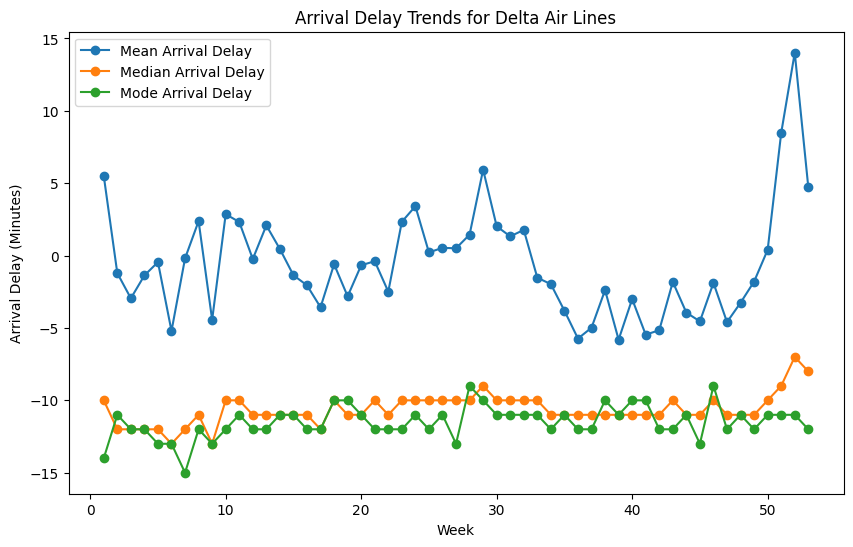

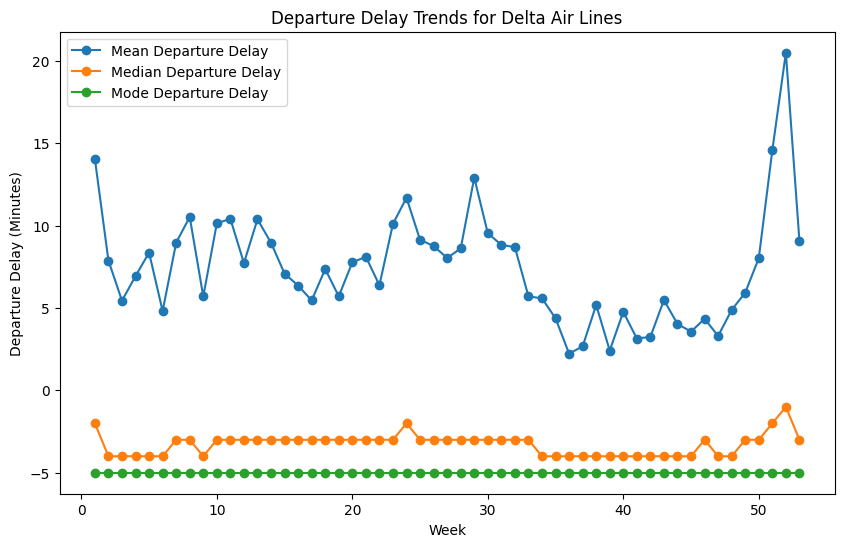

In [34]:
plot_delays('Delta Air Lines', weekly_stats)

    'UA': 'United Airlines',
    'AA': 'American Airlines',
    'HA': 'Hawaiian Airlines',
    'B6': 'JetBlue Airways',
    'F9': 'Frontier Airlines',
    'DL': 'Delta Air Lines',
    'AS': 'Alaska Airlines',
    'WN': 'Southwest Airlines',
    'NK': 'Spirit Airlines',
    'G4': 'Allegiant Air'

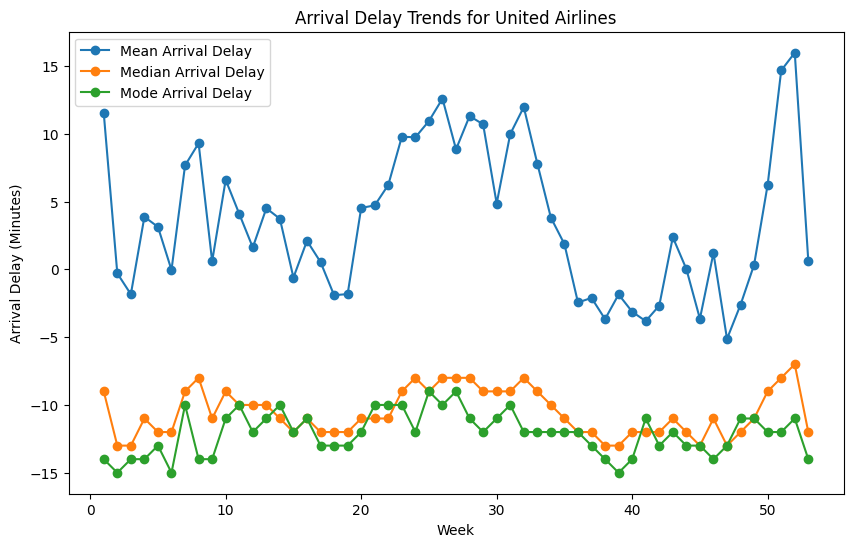

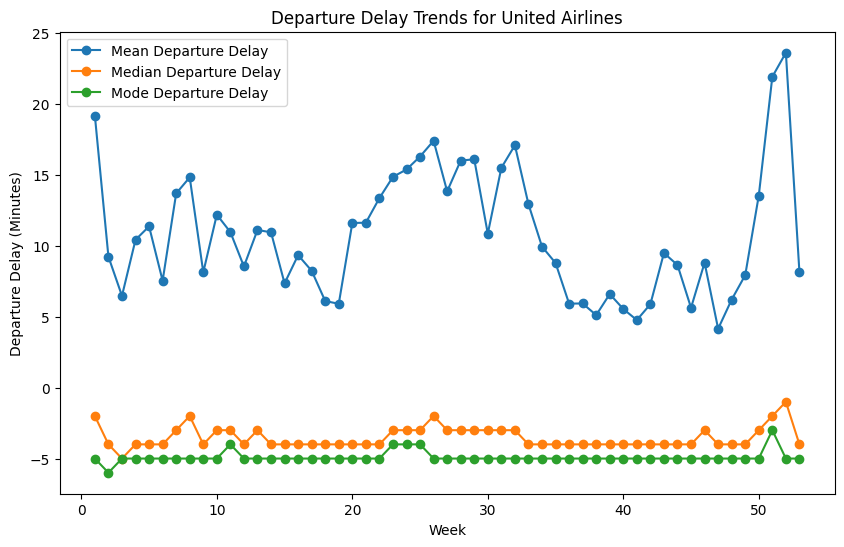

In [35]:
 plot_delays('United Airlines', weekly_stats)

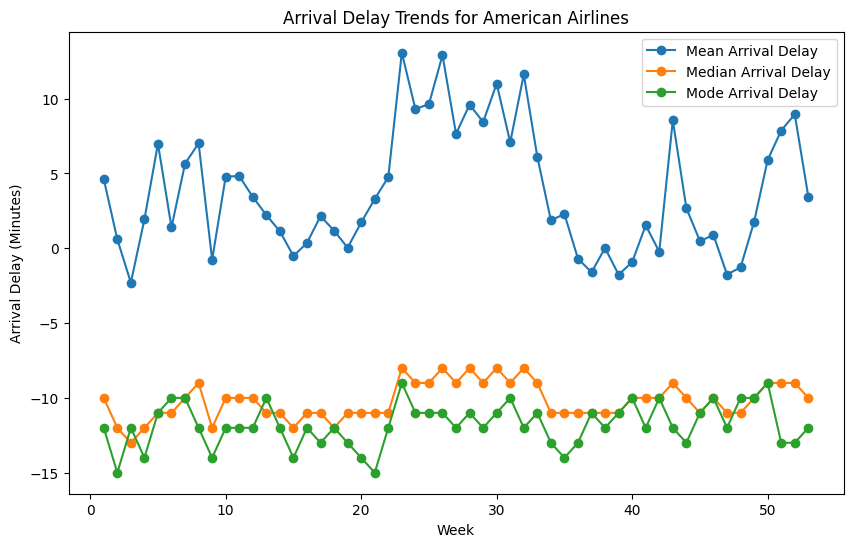

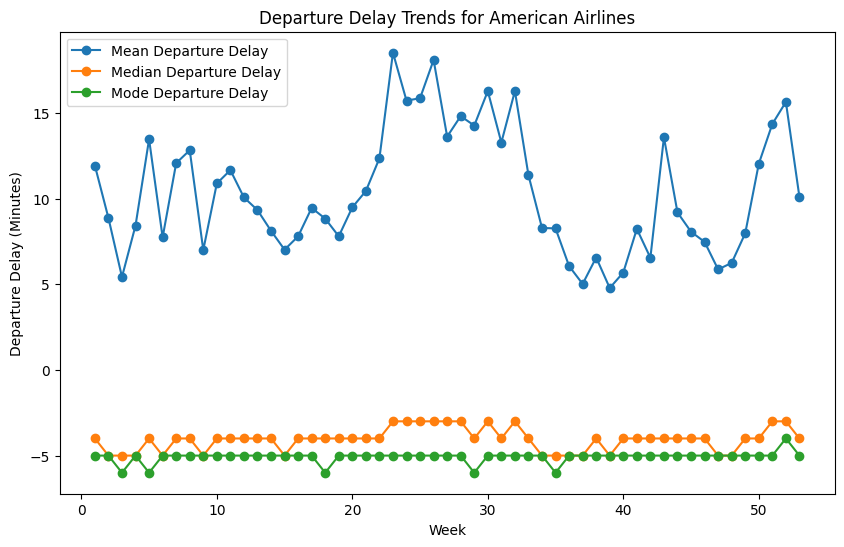

In [36]:
plot_delays('American Airlines', weekly_stats)

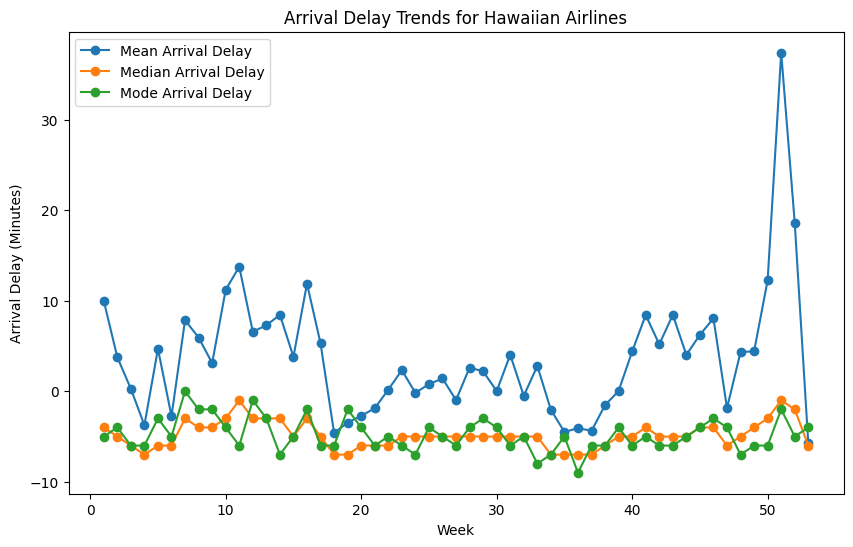

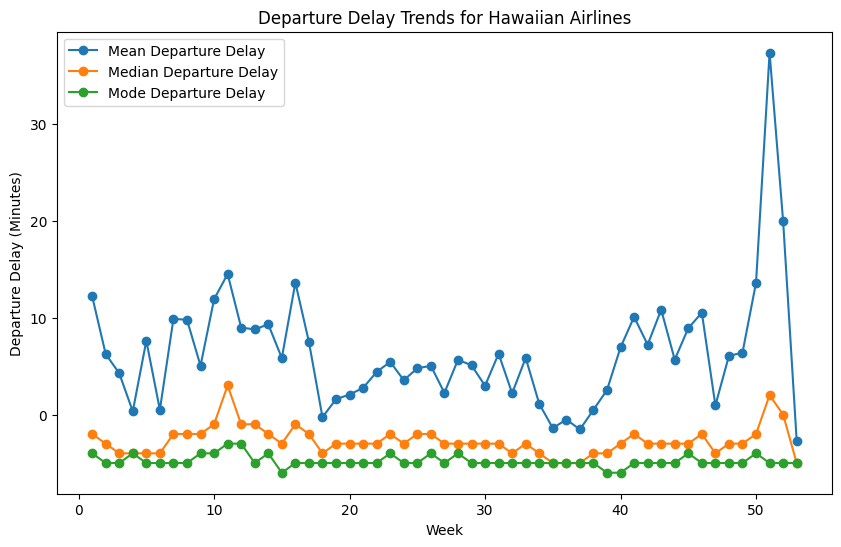

In [37]:
 plot_delays('Hawaiian Airlines', weekly_stats)

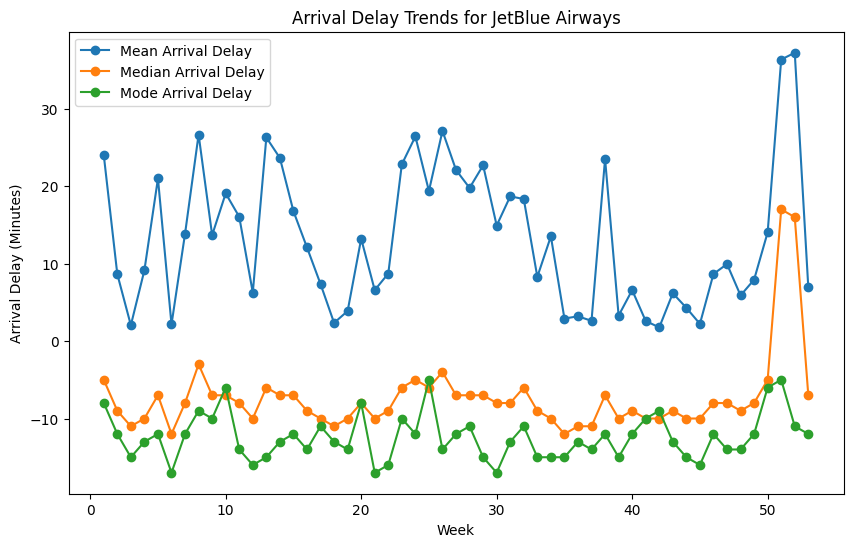

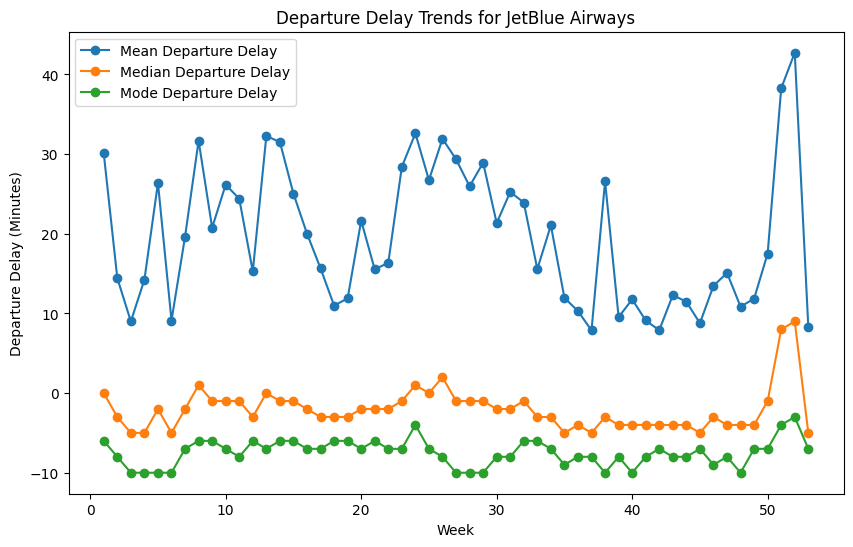

In [38]:
plot_delays('JetBlue Airways', weekly_stats)

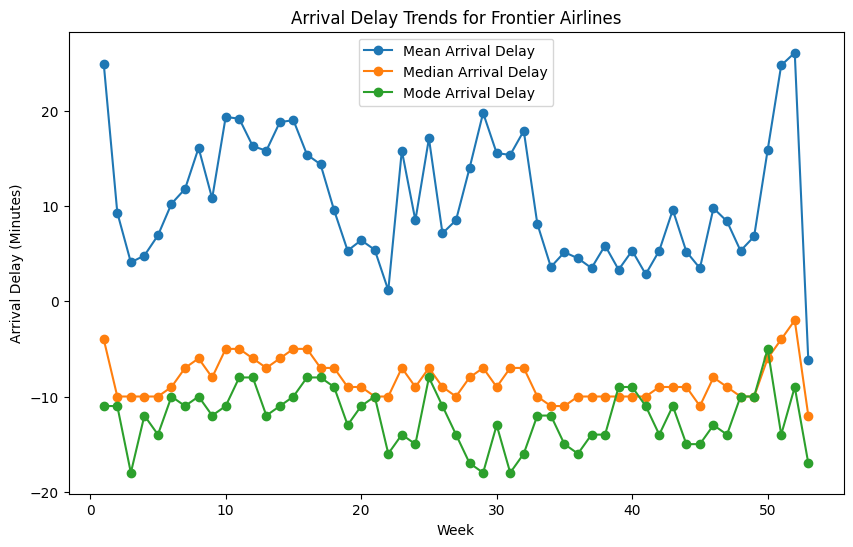

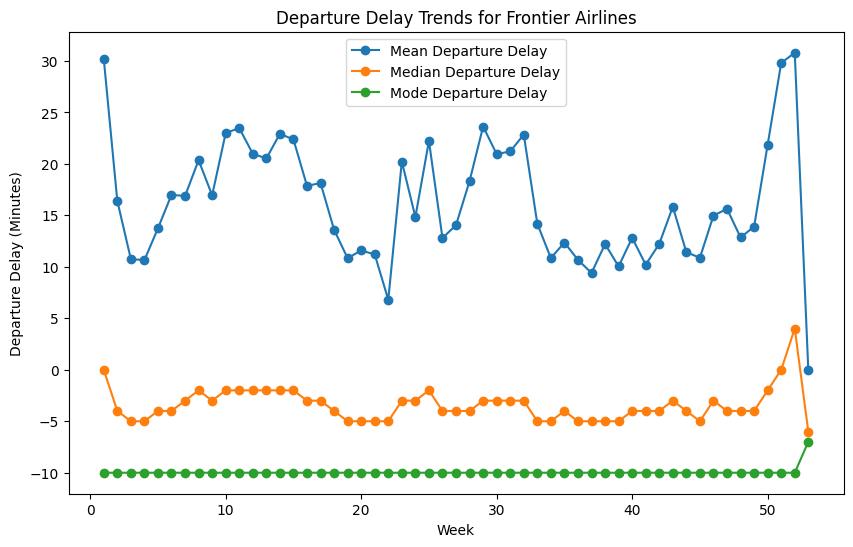

In [39]:
 plot_delays('Frontier Airlines', weekly_stats)

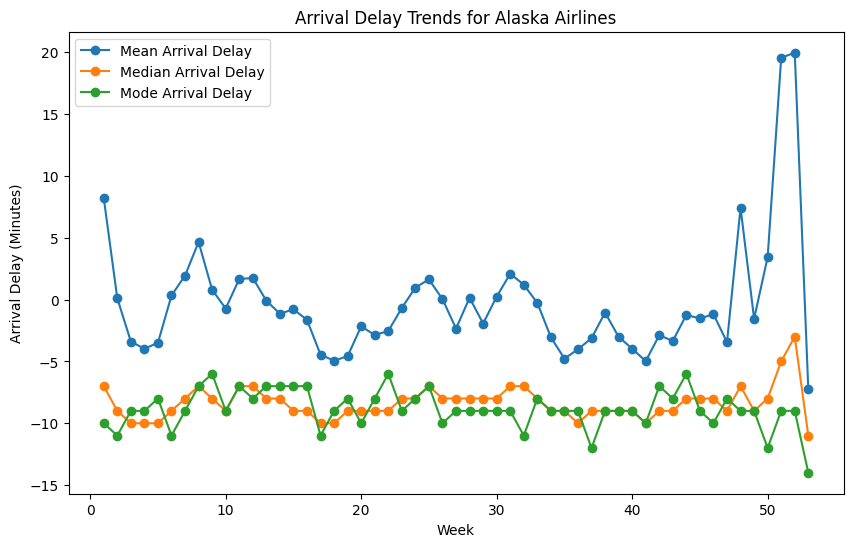

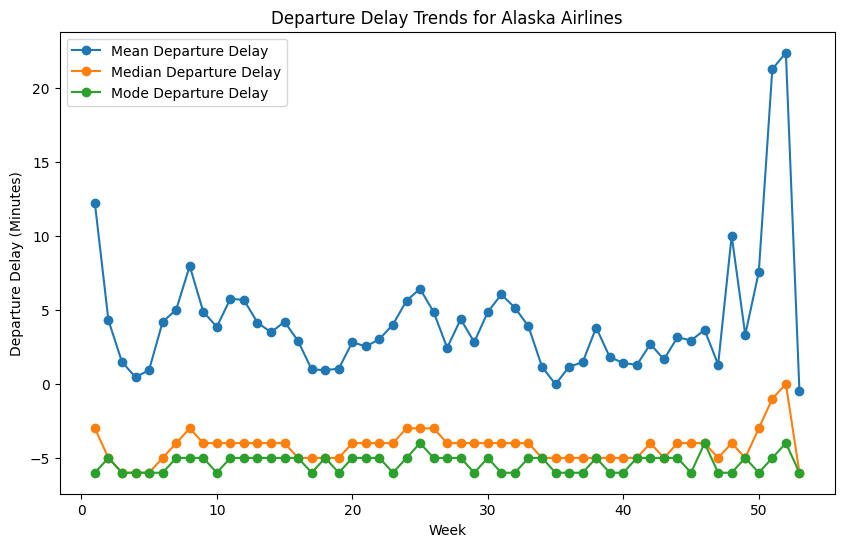

In [40]:
plot_delays('Alaska Airlines', weekly_stats)

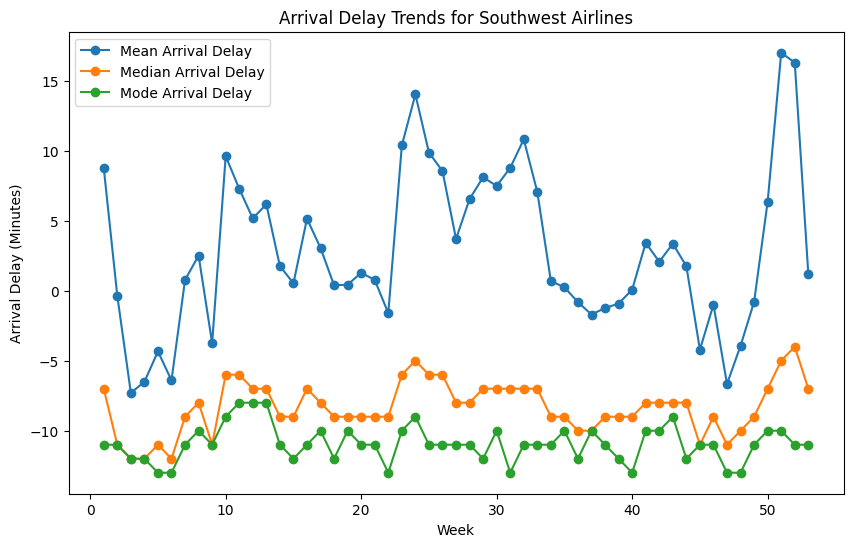

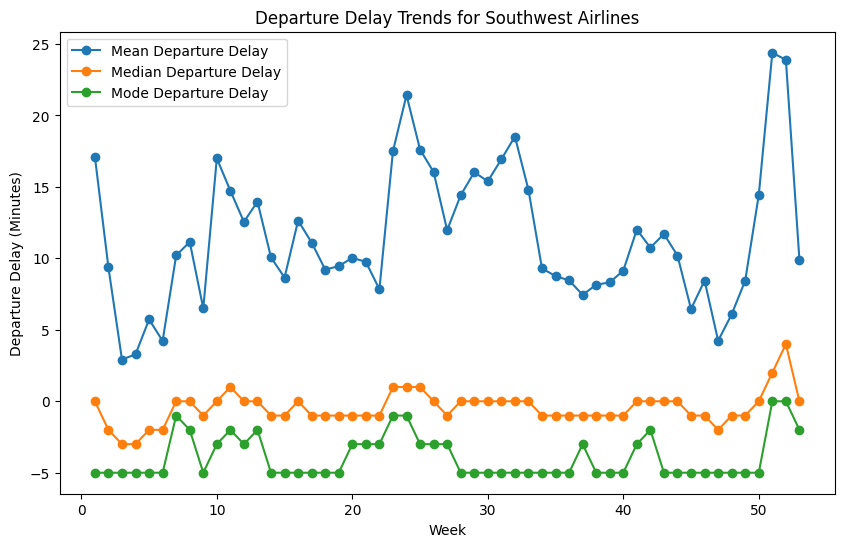

In [41]:
 plot_delays('Southwest Airlines', weekly_stats)

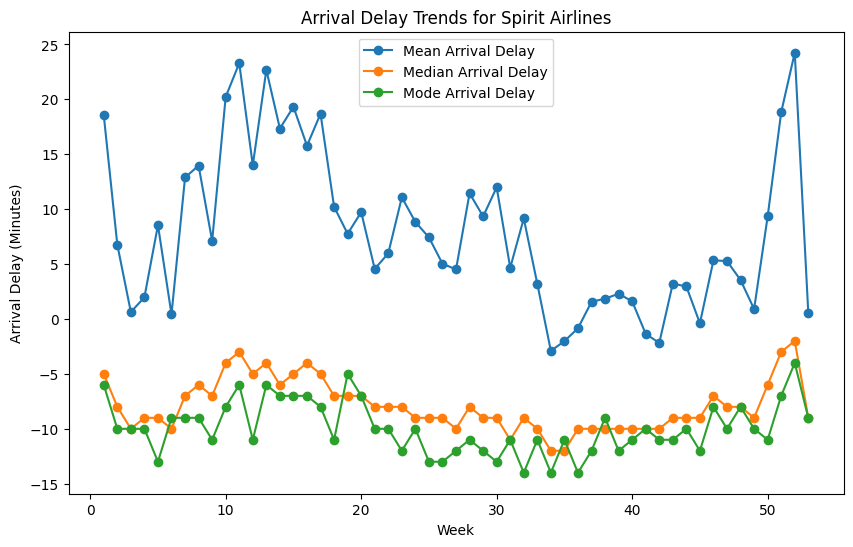

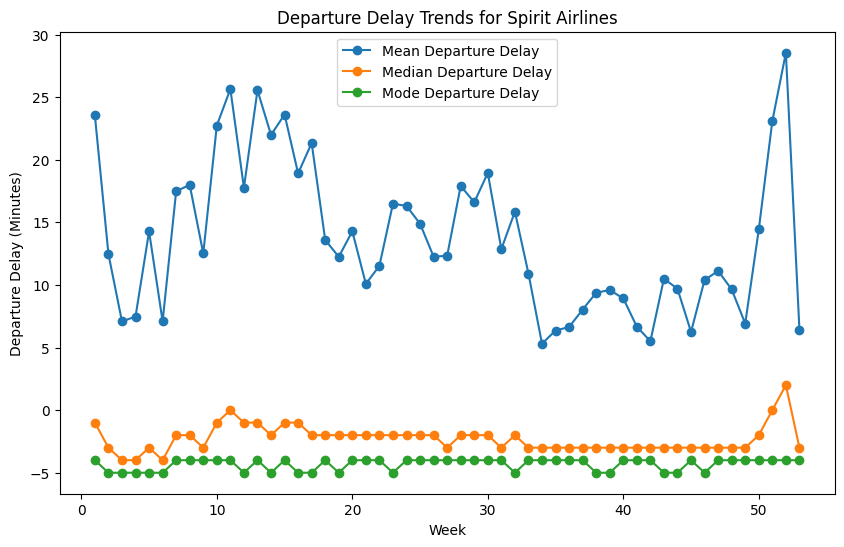

In [42]:
plot_delays('Spirit Airlines', weekly_stats)

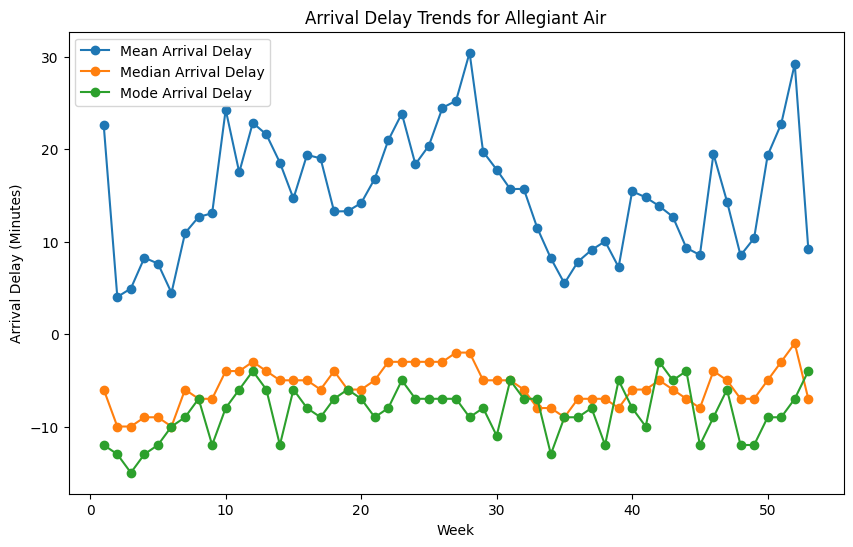

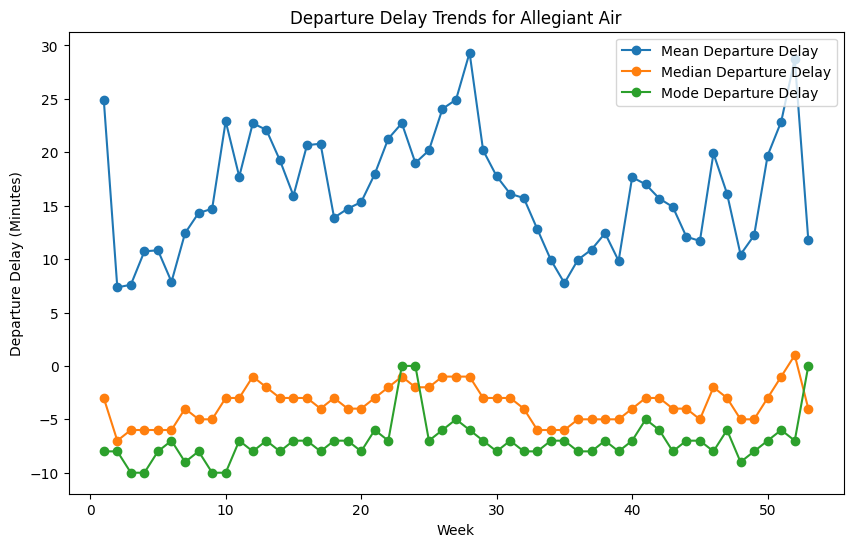

In [43]:
 plot_delays('Allegiant Air', weekly_stats)

## Plotting Airline Arrival and Departure Delays(mean, median, mode) for all Airlines

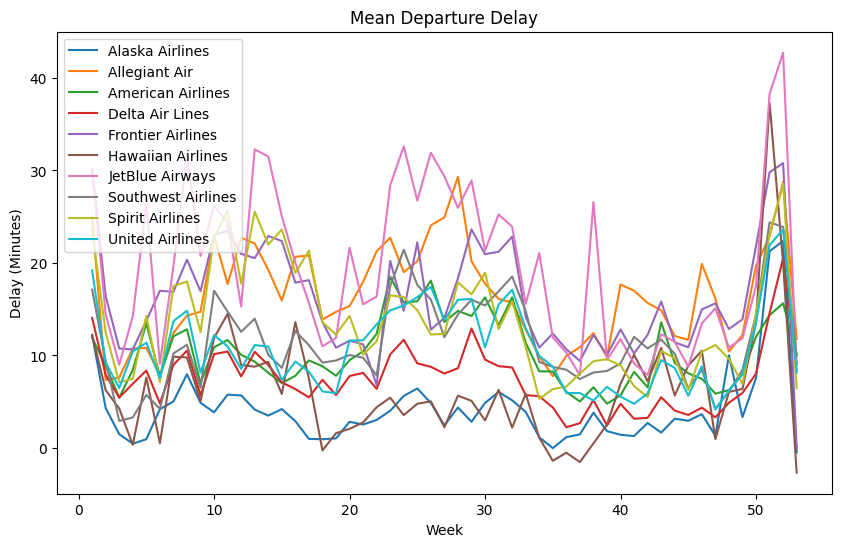

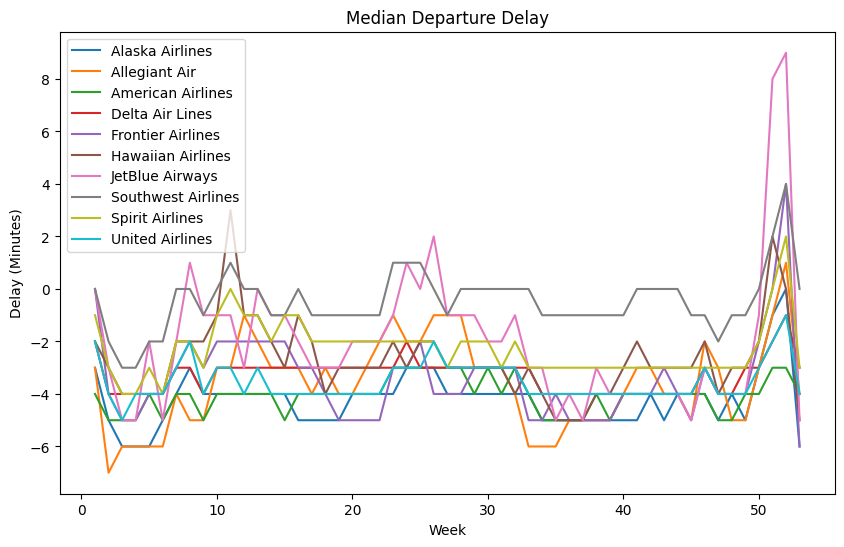

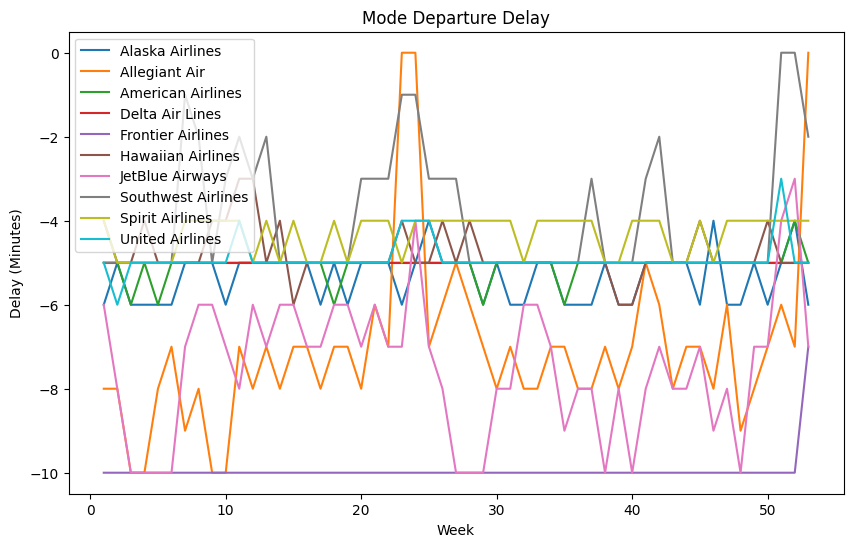

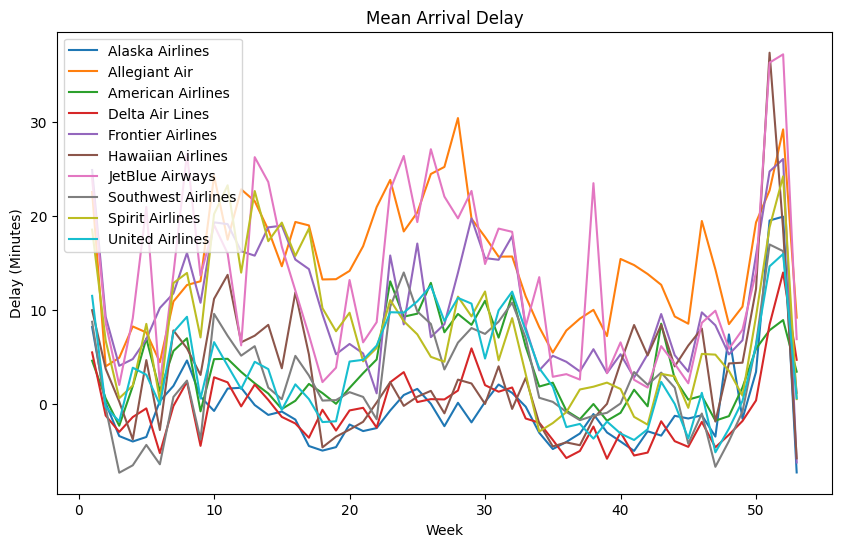

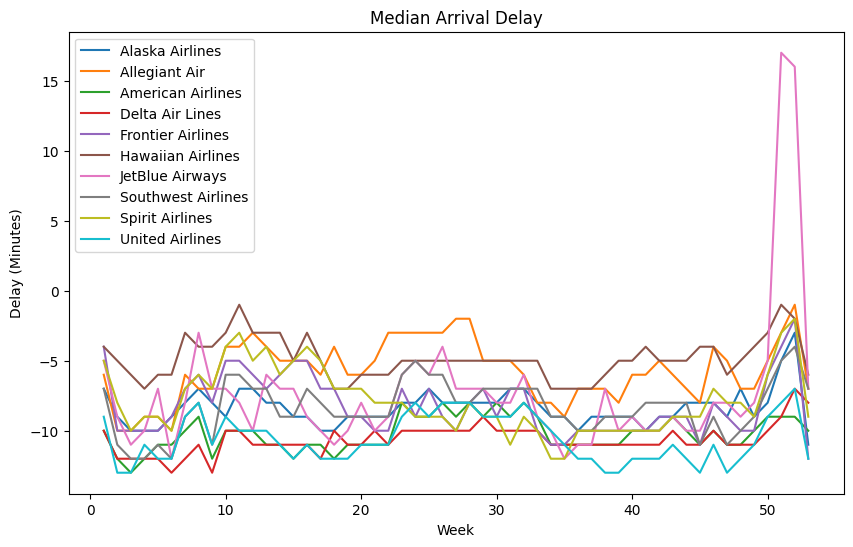

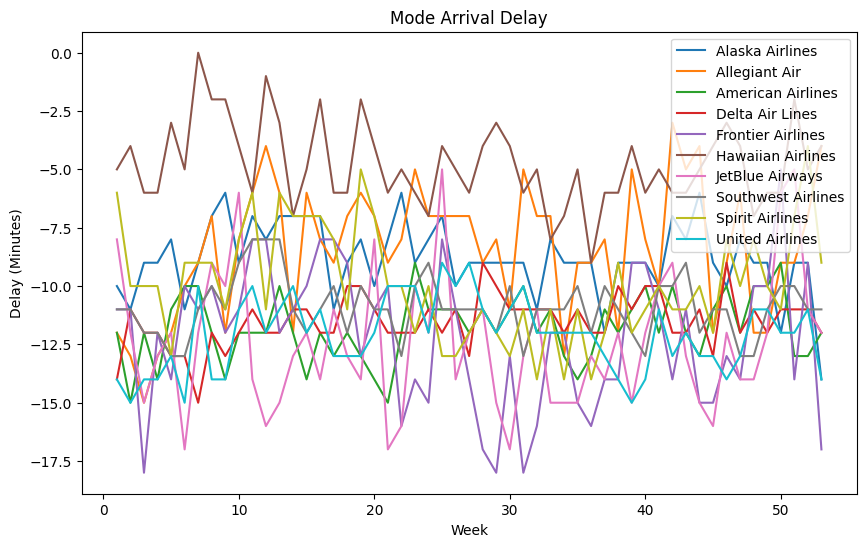

In [44]:
# List of airlines (you can dynamically get unique values from 'weekly_stats' if needed)
airlines = weekly_stats['airline'].unique()

# Function to plot delays
def plot_delay(column, title):
    plt.figure(figsize=(10, 6))
    for airline in airlines:
        # Filter data for the current airline
        airline_data = weekly_stats[weekly_stats['airline'] == airline]
        
        # Plot the trend for this airline
        plt.plot(airline_data['week'], airline_data[column], label=airline)

    # Add labels and title
    plt.xlabel('Week')
    plt.ylabel('Delay (Minutes)')
    plt.title(title)
    
    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

# Plot mean departure delay
plot_delay('mean_dep_delay', 'Mean Departure Delay')

# Plot median departure delay
plot_delay('median_dep_delay', 'Median Departure Delay')

# Plot mode departure delay
plot_delay('mode_dep_delay', 'Mode Departure Delay')

# Plot mean arrival delay
plot_delay('mean_arr_delay', 'Mean Arrival Delay')

# Plot median arrival delay
plot_delay('median_arr_delay', 'Median Arrival Delay')

# Plot mode arrival delay
plot_delay('mode_arr_delay', 'Mode Arrival Delay')

The above code creates plots to show how delays (departure and arrival) vary across different airlines over several weeks.
-  **List of Airlines:**
   The unique airlines are extracted from the weekly_stats dataset using weekly_stats['airline'].unique().
- **Plotting Function:**
   A function called plot_delay is defined to:
   - Take the type of delay (e.g., mean, median, or mode) and a title as input.
   - For each airline, it filters the data to get their delays and then plots it.
   - The plot shows delays for each airline over the weeks, with proper labels and a legend.
- **Generate Plots:**
   The function is called several times to plot different types of delays:
   - Mean Departure Delay
   - Median Departure Delay
   - Mode Departure Delay
   - Mean Arrival Delay
   - Median Arrival Delay
   - Mode Arrival Delay

## Histogram of Departure Delay Times (dep_delay_min)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


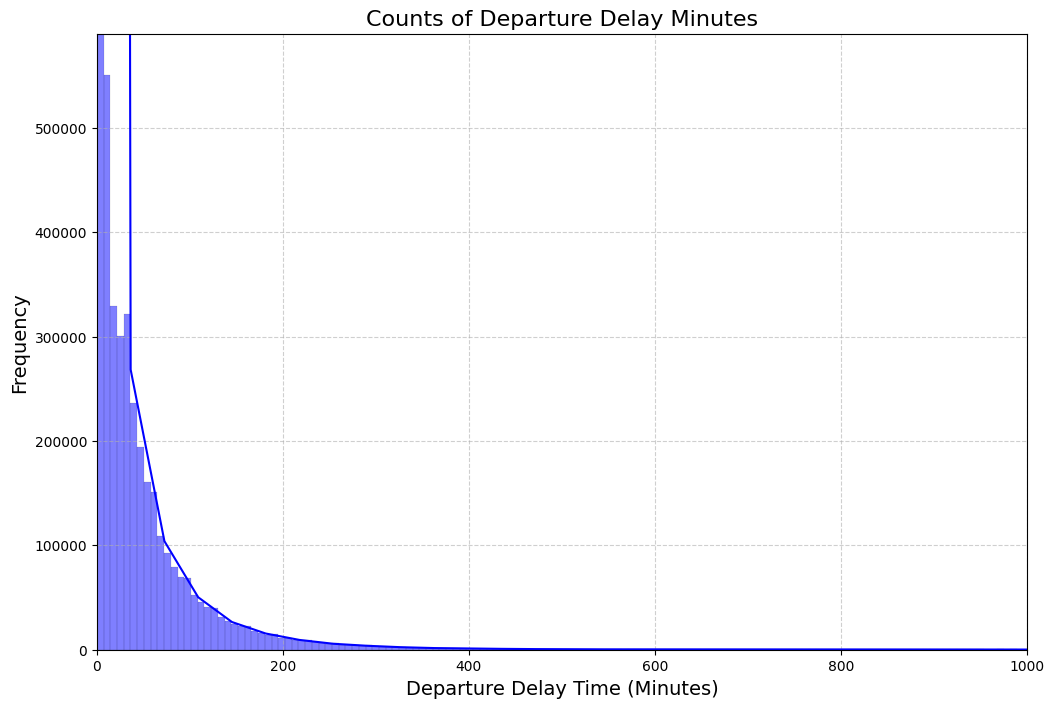

In [45]:
# Create a histogram with enhanced details
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.histplot(data=df_renamed, x="dep_delay_min", bins=1000, kde=True, color='blue')  # Add KDE (Kernel Density Estimate) for smoother distribution
plt.xlim(left=0, right=1000)  # Set x-axis limit for clarity
plt.ylim(bottom=0, top=590000)  # Set y-axis limit to match data range

# Title and labels with improved formatting
plt.title("Counts of Departure Delay Minutes", fontsize=16)
plt.xlabel("Departure Delay Time (Minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### Creating the Histogram:
sns.histplot(data=df_renamed, x="dep_delay_min", bins=1000, kde=True, color='blue'):
   - Plots a histogram using the data in the df_renamed DataFrame.
   - The x-axis shows departure delays (`dep_delay_min`).
   - bins=1000 creates many small bars to capture detailed data.
   - kde=True adds a smooth line to show the distribution.
   - color='blue` sets the color of the histogram to blue.
### Setting Axis Limits:
 plt.xlim(left=0, right=1000):
   - Limits the x-axis to show delays between 0 and 1000 minutes.
 plt.ylim(bottom=0, top=590000):
   - Limits the y-axis to a reasonable range for the frequency of delays.
### Adding Titles and Labels:
plt.title("Counts of Departure Delay Minutes", fontsize=16):
   - Adds a title to the plot.
plt.xlabel("Departure Delay Time (Minutes)", fontsize=14):
   - Labels the x-axis.
plt.ylabel("Frequency", fontsize=14):
   - Labels the y-axis.
### Adding Gridlines:
plt.grid(True, linestyle='--', alpha=0.6):
   - Adds dashed gridlines to make the plot easier to read.

## Analyzing the Distribution of Departure Delays

In [46]:
df_renamed["dep_delay_min"].value_counts()

dep_delay_min
0.0       10848301
1.0         297767
2.0         235266
3.0         202005
4.0         177144
            ...   
2012.0           1
1863.0           1
1618.0           1
1723.0           1
2668.0           1
Name: count, Length: 1915, dtype: int64

**["dep_delay_min"]**: This selects the column that contains the departure delay times (in minutes).

**.value_counts()**: This counts how many times each unique delay time appears in the column and returns the result.

The result shows how often each departure delay occurs, helping us understand the distribution of delays in the dataset.

# ECDF of Departure Delays

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


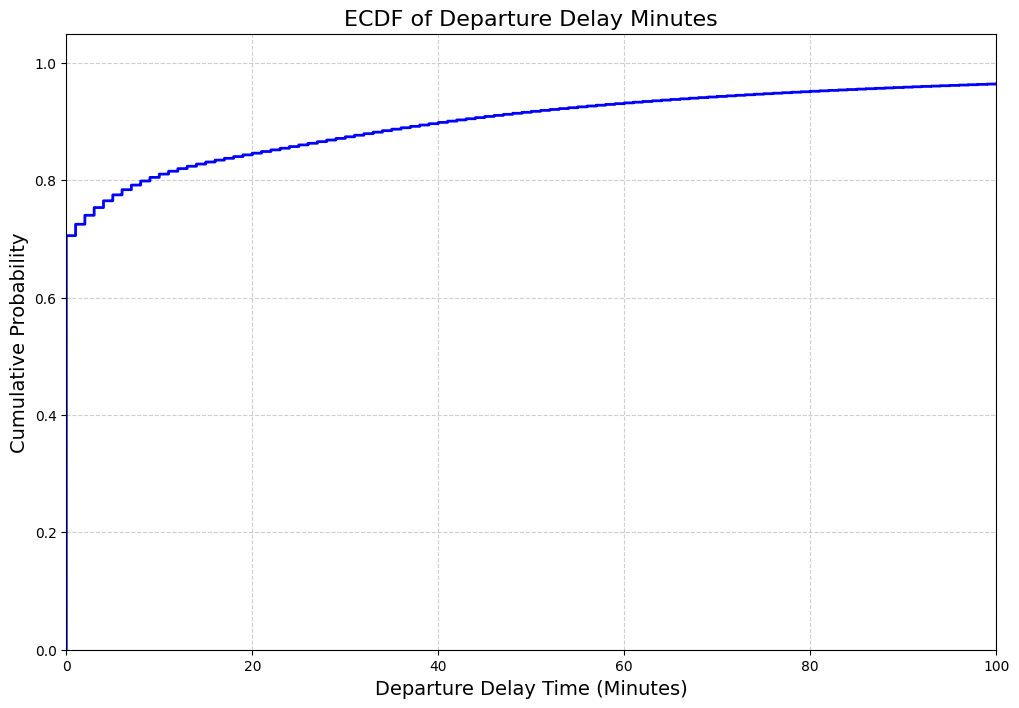

In [47]:
# Create ECDF plot with enhanced details
plt.figure(figsize=(12, 8))  # Set a larger figure size
sns.ecdfplot(data=df_renamed, x="dep_delay_min", color='blue', linewidth=2)  # Set line color and width for better visibility

# Set axis limits for clarity
plt.xlim(left=0, right=100)
plt.ylim(bottom=0, top=1.05)  # ECDF should go from 0 to 1

# Title and labels with improved formatting
plt.title("ECDF of Departure Delay Minutes", fontsize=16)
plt.xlabel("Departure Delay Time (Minutes)", fontsize=14)
plt.ylabel("Cumulative Probability", fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### ECDF
An Empirical Cumulative Distribution Function (ECDF) is a statistical plot that shows the proportion of data points less than or equal to a certain value. It helps in understanding the distribution of data by visualizing how values accumulate across the dataset.
#### ECDF Plot:
- The above code generates an Empirical Cumulative Distribution Function (ECDF) plot for the departure delay times in minutes.
- ECDF shows the cumulative probability of the departure delays, indicating how many values are less than or equal to each point.
#### Axis Limits:
The x-axis (departure delay time) is limited to 0 to 100 minutes, and the y-axis (cumulative probability) ranges from 0 to just above 1.

#### Title and Labels:
The plot is titled “ECDF of Departure Delay Minutes” and labeled with “Departure Delay Time (Minutes)” for the x-axis and “Cumulative Probability” for the y-axis.

#### Gridlines:
Gridlines are added to make the plot easier to read.


# Histogram of Arrival Delay Minutes

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


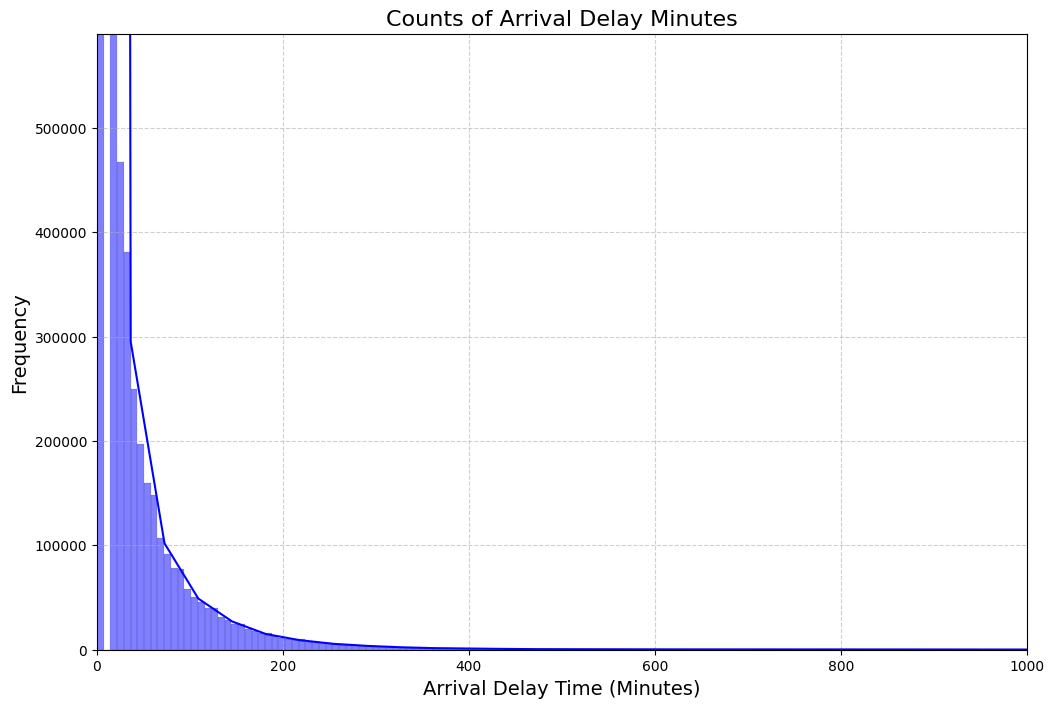

In [48]:
# Create a histogram with enhanced details
plt.figure(figsize=(12, 8))  # Set a larger figure size
sns.histplot(data=df_renamed, x="arr_delay_min", bins=1000, kde=True, color='blue')  # Add KDE for smoother distribution
plt.xlim(left=0, right=1000)  # Set x-axis limit for clarity
plt.ylim(bottom=0, top=590000)  # Set y-axis limit to match the data range

# Title and labels with improved formatting
plt.title("Counts of Arrival Delay Minutes", fontsize=16)
plt.xlabel("Arrival Delay Time (Minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

#### Histogram Plot Creation:
- The code above creates a histogram to display the distribution of arrival delays in minutes.
- A Kernel Density Estimate (KDE) is added for a smoother curve showing the distribution.
#### Axis Limits:
- The x-axis (arrival delay time) is limited from 0 to 1000 minutes to focus on relevant data.
- The y-axis (frequency) is adjusted to range from 0 to 590,000 to match the data distribution.
#### Title and Labels:
- The plot is titled “Counts of Arrival Delay Minutes,” with the x-axis labeled as “Arrival Delay Time (Minutes)” and the y-axis as “Frequency.”


In [49]:
df_renamed["arr_delay_min"].value_counts()

arr_delay_min
0.0       12150937
15.0        113657
16.0        107593
17.0        101411
18.0         95747
            ...   
1852.0           1
2984.0           1
1795.0           1
2004.0           1
1730.0           1
Name: count, Length: 1907, dtype: int64

The code line df_renamed["arr_delay_min"].value_counts() returns a count of unique values in the "arr_delay_min" column from the df_renamed DataFrame. It shows how many times each arrival delay time (in minutes) appears in the dataset.

# ECDF Plot for Arrival Delay Minutes

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


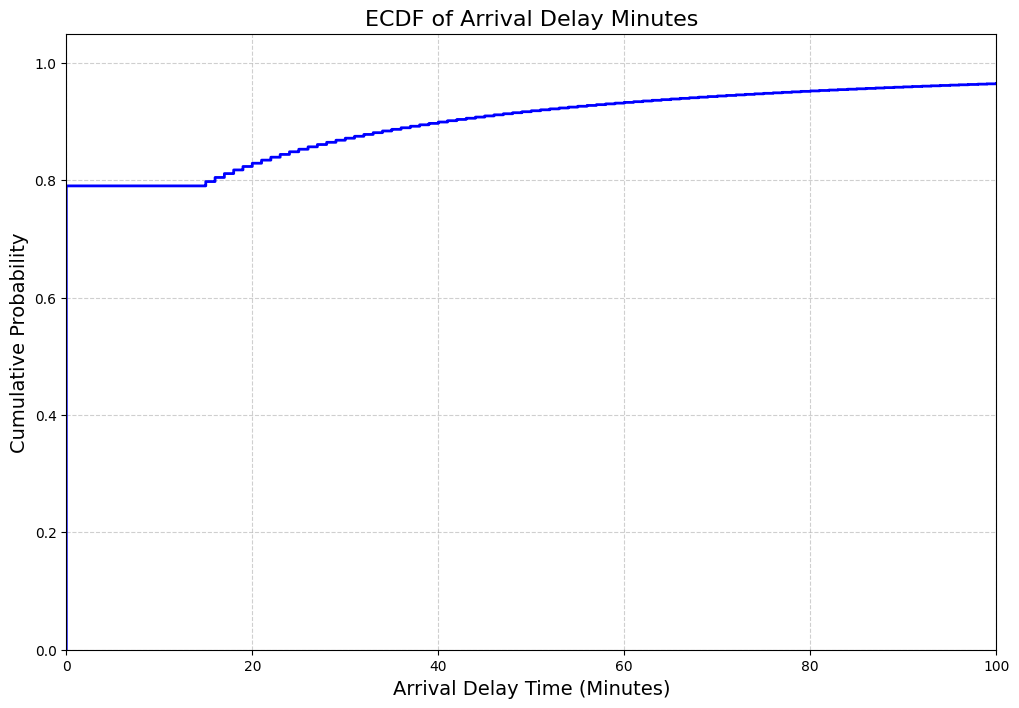

In [50]:
# Create ECDF plot with enhanced details
plt.figure(figsize=(12, 8))  # Set a larger figure size
sns.ecdfplot(data=df_renamed, x="arr_delay_min", color='blue', linewidth=2)  # Set line color and width for better visibility

# Set axis limits for clarity
plt.xlim(left=0, right=100)
plt.ylim(bottom=0, top=1.05)  # ECDF should go from 0 to 1

# Title and labels with improved formatting
plt.title("ECDF of Arrival Delay Minutes", fontsize=16)
plt.xlabel("Arrival Delay Time (Minutes)", fontsize=14)
plt.ylabel("Cumulative Probability", fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

Axis Limits:
- The x-axis (arrival delay time) is limited to 0 to 100 minutes, and the y-axis (cumulative probability) ranges from 0 to just above 1.
  
Title and Labels:
- The plot is titled “ECDF of Arrival Delay Minutes” and labeled with “Arrival Delay Time (Minutes)” for the x-axis and “Cumulative Probability” for the y-axis.

In [51]:
# Check the data with 0-15 minutes arrrival delay time
df_15 = df_renamed[(df_renamed["arr_delay_min"] < 15) & (df_renamed["arr_delay_min"] > 0)]

In [52]:
df_15.shape

(0, 25)

# Top 10 Cities with the Highest Average Departure Delays

In [53]:
df_delayed_city= df_renamed.groupby("origin")["dep_delay_min"]\
.describe().sort_values("mean", ascending = False).head(10)

df_delayed_city

count       mean         std  min  25%  50%    75%  \
origin                                                                    
Pago Pago, TT         91.0  80.087912  252.730276  0.0  0.0  6.0  43.50   
Bishop, CA           445.0  41.532584  149.128948  0.0  0.0  0.0  23.00   
Stockton, CA        1258.0  33.346582   83.411608  0.0  0.0  4.5  40.00   
Aguadilla, PR       3956.0  32.035642   82.475869  0.0  0.0  0.0  38.25   
Wilmington, DE       128.0  31.515625   51.145613  0.0  0.0  0.0  44.25   
Aspen, CO          13820.0  31.340593   93.050435  0.0  0.0  0.0  24.00   
Niagara Falls, NY    938.0  30.265458   82.642683  0.0  0.0  0.0  32.00   
Gunnison, CO        2126.0  29.618062  107.250221  0.0  0.0  0.0   6.00   
Ogdensburg, NY      1136.0  29.088028  130.813858  0.0  0.0  0.0   0.00   
Cody, WY            2243.0  28.827909   86.911029  0.0  0.0  0.0  11.00   

                      max  
origin                     
Pago Pago, TT      1551.0  
Bishop, CA         1207.0  
Stockton, CA       1393.0  
Aguadilla, PR      1387.0  
Wilmington, DE      202.0  
Aspen, CO          1525.0  
Niagara Falls, NY  1721.0  
Gunnison, CO       1321.0  
Ogdensburg, NY     1600.0  
Cody, WY           1292.0

- **Group by City**: The data is grouped by the "origin" (city) to analyze departure delays for each city.
- **Calculate Statistics**: Summary statistics (like average departure delay) are calculated for each city.
- **Sort by Average Delay**: The cities are sorted in descending order by their average departure delay.
- **Get Top 10 Cities**: The top 10 cities with the highest average delays are selected.

In [54]:
df_delayed_city1= df_renamed.groupby("origin")["arr_delay_min"]\
.describe().sort_values("mean", ascending = False).head(10)

df_delayed_city1

count       mean         std  min  25%   50%    75%  \
origin                                                                     
Pago Pago, TT         91.0  81.703297  252.362239  0.0  0.0  17.0  44.50   
Bishop, CA           445.0  38.869663  146.615622  0.0  0.0   0.0  19.00   
Stockton, CA        1258.0  35.334658   84.455098  0.0  0.0   0.0  42.00   
Wilmington, DE       128.0  34.500000   52.061895  0.0  0.0   7.5  48.00   
Niagara Falls, NY    938.0  33.038380   83.420401  0.0  0.0   0.0  39.75   
Gunnison, CO        2126.0  32.529633  108.131140  0.0  0.0   0.0  23.00   
Aspen, CO          13820.0  32.360564   92.850080  0.0  0.0   0.0  30.00   
Aguadilla, PR       3956.0  31.410516   82.780537  0.0  0.0   0.0  36.00   
Cody, WY            2243.0  31.183237   86.555891  0.0  0.0   0.0  25.00   
Belleville, IL      2799.0  30.902822   85.670324  0.0  0.0   0.0  33.00   

                      max  
origin                     
Pago Pago, TT      1568.0  
Bishop, CA         1191.0  
Stockton, CA       1412.0  
Wilmington, DE      228.0  
Niagara Falls, NY  1710.0  
Gunnison, CO       1318.0  
Aspen, CO          1517.0  
Aguadilla, PR      1390.0  
Cody, WY           1288.0  
Belleville, IL     1702.0

# Barplot of Top 10 Airports with Highest Average Departure Delay Time

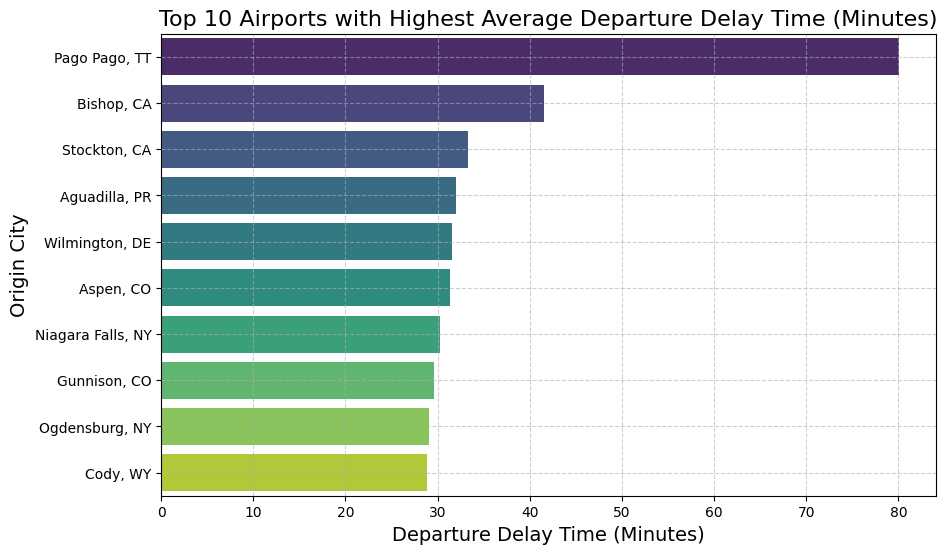

In [55]:
# Assuming df_delayed_city contains the data and already has the sorted top 10 airports
# If not, you can sort and get the top 10 first
df_top_10 = df_delayed_city.nlargest(10, 'mean')  # Sort by mean and select top 10 airports

# Create the barplot
plt.figure(figsize=(10, 6))  # Set a larger figure size for better readability
sns.barplot(data=df_top_10, x="mean", y=df_top_10.index, errorbar=None,  palette="viridis")

# Title and labels with improved formatting
plt.title("Top 10 Airports with Highest Average Departure Delay Time (Minutes)", fontsize=16)
plt.xlabel("Departure Delay Time (Minutes)", fontsize=14)
plt.ylabel("Origin City", fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

# Barplot of Top 10 Airports with Highest Average Arrival Delay Time

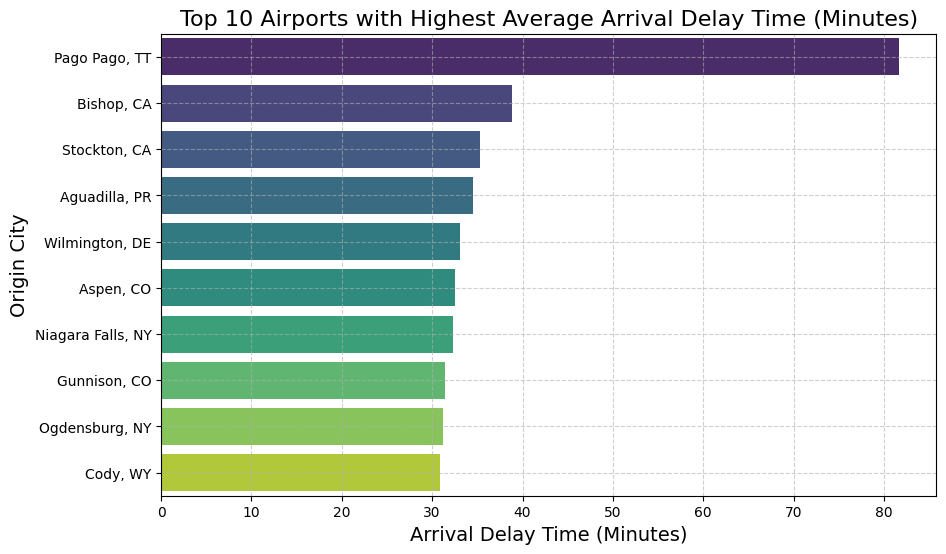

In [56]:
# Assuming df_dep_delay_without_outli contains the data without outliers and is already sorted
# If not, you can sort and get the top 10 first
df_top_101 = df_delayed_city1.nlargest(10, 'mean')  # Sort by mean and select top 10 airports

# Create the barplot
plt.figure(figsize=(10, 6))  # Set a larger figure size for better readability
sns.barplot(data=df_top_101, x="mean", y=df_top_10.index, errorbar=None, palette="viridis")  # Change palette to 'viridis'

# Title and labels with improved formatting
plt.title("Top 10 Airports with Highest Average Arrival Delay Time (Minutes)", fontsize=16)
plt.xlabel("Arrival Delay Time (Minutes)", fontsize=14)
plt.ylabel("Origin City", fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

# Normalization of Departure and Arrival Delays

In [57]:
# Combine the two dataframes (arrival and departure) into a single dataframe
df_combined = pd.merge(df_delayed_city[['mean']], df_delayed_city1[['mean']], 
                       left_index=True, right_index=True, 
                       suffixes=('_dep', '_arr'))

# Now df_combined contains both 'mean_dep' and 'mean_arr' for each airport
# You can check this with: df_combined.head()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to normalize both departure and arrival delay means
df_combined[['mean_dep', 'mean_arr']] = scaler.fit_transform(df_combined[['mean_dep', 'mean_arr']])

# Display the combined and normalized data
print(df_combined)

                   mean_dep  mean_arr
origin                               
Pago Pago, TT      2.753887  2.797787
Bishop, CA         0.253780 -0.008028
Stockton, CA      -0.277039 -0.239588
Aguadilla, PR     -0.362046 -0.496639
Wilmington, DE    -0.395767 -0.294262
Aspen, CO         -0.407117 -0.434406
Niagara Falls, NY -0.476833 -0.390006
Gunnison, CO      -0.518814 -0.423331
Cody, WY          -0.570051 -0.511527


- The code merges two DataFrames (df_delayed_city and df_delayed_city1) based on their index, creating a new DataFrame (df_combined) with columns for both departure (mean_dep) and arrival (mean_arr) delay means for each airport.
- A StandardScaler is used to normalize the mean_dep and mean_arr columns. This scales the data so that both columns have a mean of 0 and a standard deviation of 1.

# Bar Plots of Normalized Departure and Arrival Delays for Top 10 Airports

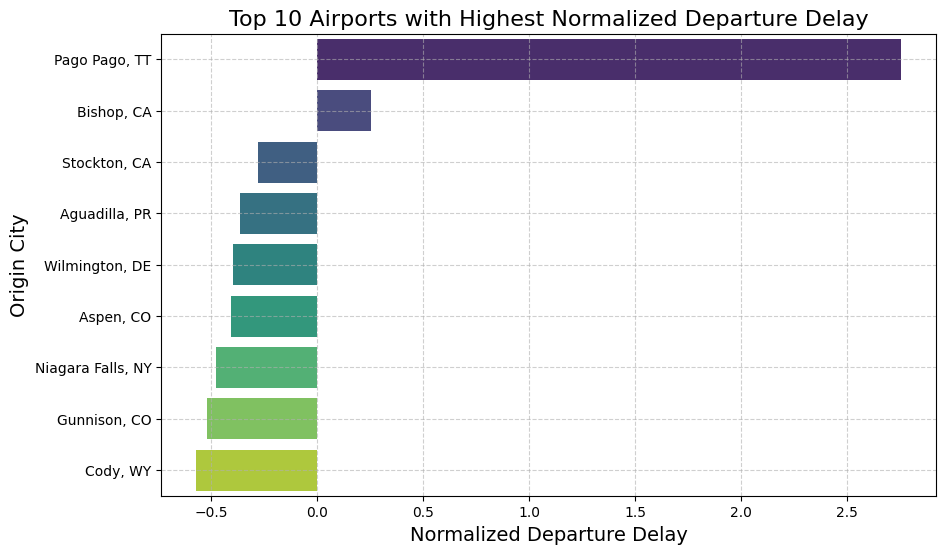

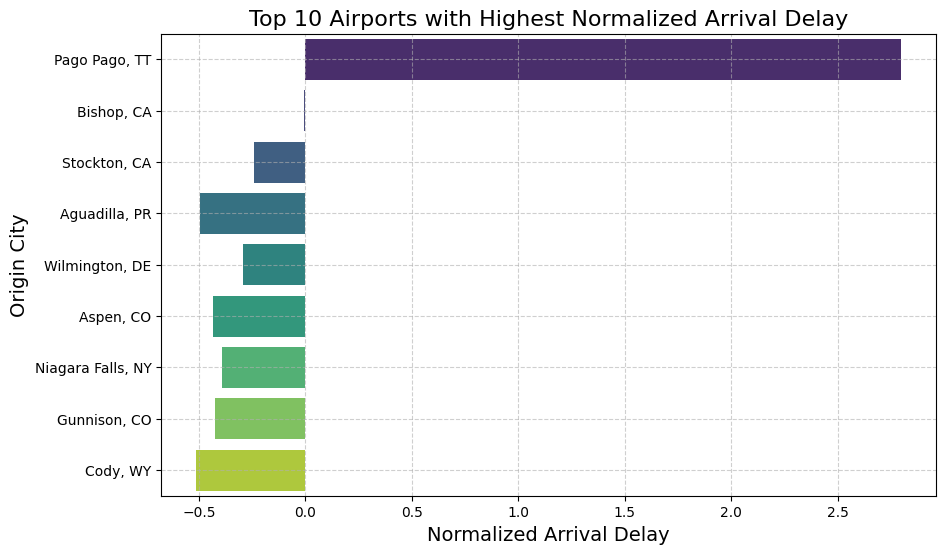

In [58]:
# Plotting the normalized departure delays with airports on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, y=df_combined.index, x='mean_dep', palette="viridis")
plt.title("Top 10 Airports with Highest Normalized Departure Delay", fontsize=16)
plt.ylabel("Origin City", fontsize=14)
plt.xlabel("Normalized Departure Delay", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plotting the normalized arrival delays with airports on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, y=df_combined.index, x='mean_arr', palette="viridis")
plt.title("Top 10 Airports with Highest Normalized Arrival Delay", fontsize=16)
plt.ylabel("Origin City", fontsize=14)
plt.xlabel("Normalized Arrival Delay", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Data Normalization and Logarithmic Transformation

In [59]:
# Step 1: Normalize the data using StandardScaler
scaler = StandardScaler()
df_combined[['mean_dep', 'mean_arr']] = scaler.fit_transform(df_combined[['mean_dep', 'mean_arr']])

# Step 2: Apply logarithmic transformation (log normalization) to the normalized values
# To avoid log(0) error, we add a small constant to the data (e.g., 1) before applying log.
df_combined['log_mean_dep'] = np.log(df_combined['mean_dep'] + 1)
df_combined['log_mean_arr'] = np.log(df_combined['mean_arr'] + 1)

# Show the updated dataframe
print(df_combined)

                   mean_dep  mean_arr  log_mean_dep  log_mean_arr
origin                                                           
Pago Pago, TT      2.753887  2.797787      1.322792      1.334418
Bishop, CA         0.253780 -0.008028      0.226163     -0.008060
Stockton, CA      -0.277039 -0.239588     -0.324400     -0.273895
Aguadilla, PR     -0.362046 -0.496639     -0.449490     -0.686447
Wilmington, DE    -0.395767 -0.294262     -0.503795     -0.348512
Aspen, CO         -0.407117 -0.434406     -0.522758     -0.569879
Niagara Falls, NY -0.476833 -0.390006     -0.647855     -0.494306
Gunnison, CO      -0.518814 -0.423331     -0.731501     -0.550487
Cody, WY          -0.570051 -0.511527     -0.844088     -0.716471


- Normalize the Data:
The StandardScaler is used to normalize the columns mean_dep and mean_arr of the df_combined dataframe. This step transforms the data to have a mean of 0 and a standard deviation of 1.
- Logarithmic Transformation:
A logarithmic transformation is applied to the normalized values of mean_dep and mean_arr to reduce skewness and handle potential outliers. A small constant (1) is added to avoid issues with log(0).

# Bar Plots for Log-Normalized Departure and Arrival Delays

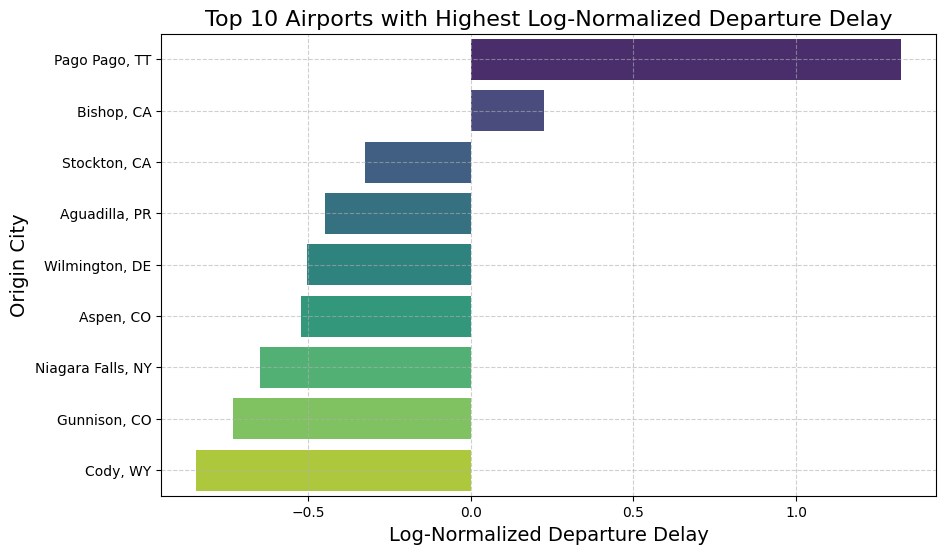

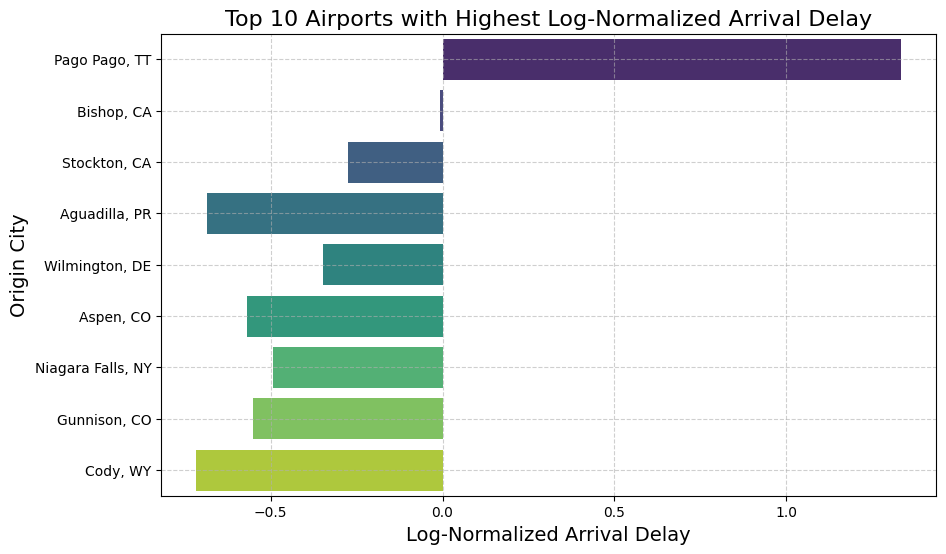

In [60]:
# Plotting the log-normalized departure delays with airports on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, y=df_combined.index, x='log_mean_dep', palette="viridis")
plt.title("Top 10 Airports with Highest Log-Normalized Departure Delay", fontsize=16)
plt.ylabel("Origin City", fontsize=14)
plt.xlabel("Log-Normalized Departure Delay", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plotting the log-normalized arrival delays with airports on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, y=df_combined.index, x='log_mean_arr', palette="viridis")
plt.title("Top 10 Airports with Highest Log-Normalized Arrival Delay", fontsize=16)
plt.ylabel("Origin City", fontsize=14)
plt.xlabel("Log-Normalized Arrival Delay", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Top 5 Airlines with Highest Average Arrival Delay

In [61]:
# Step 1: Find Top 5 Airlines with Highest Average Arrival Delay
top_5_airlines = df_renamed.groupby("airline")["arr_delay_min"].mean().nlargest(5)
print("Weekly Stats for Top 5 Most Delayed Airlines:\n")
A=df_renamed[df_renamed["airline"].isin(top_5_airlines.index)].groupby("airline").describe()
print(A)

Weekly Stats for Top 5 Most Delayed Airlines:

                      date                                 \
                     count                           mean   
airline                                                     
Allegiant Air       263560  2021-11-16 07:44:39.374715392   
Frontier Airlines   331646  2022-01-01 10:41:34.510411776   
JetBlue Airways     529018  2022-02-06 11:40:15.592664320   
Spirit Airlines     480749  2022-01-14 05:19:36.436768512   
United Airlines    2764992  2021-12-23 20:46:08.495243264   

                                                             \
                                   min                  25%   
airline                                                       
Allegiant Air      2020-04-01 00:00:00  2021-03-11 00:00:00   
Frontier Airlines  2020-04-01 00:00:00  2021-05-19 00:00:00   
JetBlue Airways    2020-04-01 00:00:00  2021-07-07 00:00:00   
Spirit Airlines    2020-04-01 00:00:00  2021-05-25 00:00:00   
United Airlines    2020

1. **Calculate Average Arrival Delay for Each Airline**:
   The code groups the data by airline and calculates the mean of arrival delays (`arr_delay_min`) for each airline using `groupby("airline")["arr_delay_min"].mean()`.

2. **Find Top 5 Airlines with the Highest Average Arrival Delay**:
   `nlargest(5)` selects the top 5 airlines with the highest average arrival delay.

3. **Display Summary Statistics**:
   The code filters the original data to include only the top 5 airlines and then uses `groupby("airline").describe()` to generate descriptive statistics (e.g., count, mean, std, min, max) for each of these airlines.

4. **Print the Results**:
   The results are printed showing the summary statistics for the top 5 airlines with the highest average arrival delays.


In [62]:
# Step 2: Find Top 5 Cities with Highest Average Arrival Delay
top_5_cities = df_renamed.groupby("origin")["arr_delay_min"].mean().nlargest(5)
print("Weekly Stats for Top 5 Most Delayed cities:\n")
print(df_renamed[df_renamed["origin"].isin(top_5_cities.index)].groupby("origin").describe())

Weekly Stats for Top 5 Most Delayed cities:

                   date                                                      \
                  count                           mean                  min   
origin                                                                        
Bishop, CA          445  2022-07-08 13:09:34.382022656  2021-12-19 00:00:00   
Niagara Falls, NY   938  2021-10-30 05:26:59.616204800  2020-04-01 00:00:00   
Pago Pago, TT        91  2022-09-28 03:25:42.857142784  2021-09-13 00:00:00   
Stockton, CA       1258  2021-11-21 17:14:47.122416640  2020-04-01 00:00:00   
Wilmington, DE      128            2021-09-12 00:11:15  2021-02-11 00:00:00   

                                                             \
                                   25%                  50%   
origin                                                        
Bishop, CA         2022-02-07 00:00:00  2022-03-25 00:00:00   
Niagara Falls, NY  2021-02-21 06:00:00  2021-11-12 00:00:00   
Pago Pa

### Observations 
1. **Allegiant Air**
   - **Peak Delay**: Allegiant Air has a peak arrival delay of 53 minutes, as indicated by the max value in the "week" column.
   - **Low Delay**: The minimum delay for Allegiant Air is 1 minute, which signifies that some flights had very minimal delay.
   - **Distribution**: The airline shows a relatively higher spread of delays, with a standard deviation of 14.7 minutes. Most of the delays are distributed within a range of 13 to 38 minutes, as indicated by the 25th, 50th, and 75th percentiles.

2. **Frontier Airlines**
   - **Peak Delay**: Frontier Airlines has a peak delay of 53 minutes, similar to Allegiant Air.
   - **Low Delay**: Like Allegiant, the minimum delay is 1 minute, showing that some flights had very short delays.
   - **Distribution**: The delays for Frontier are fairly concentrated with a standard deviation of 15.1 minutes. Delays range predominantly between 13 and 40 minutes, with the middle 50% of delays clustering around the median of 27 minutes.

3. **JetBlue Airways**
   - **Peak Delay**: JetBlue Airways experiences a maximum delay of 53 minutes, which is consistent with the other airlines.
   - **Low Delay**: The lowest delay recorded is also 1 minute.
   - **Distribution**: JetBlue’s delays have a slightly broader distribution with a standard deviation of 15.2 minutes. Similar to the other airlines, most delays fall within the 13 to 40 minutes range.

4. **Spirit Airlines**
   - **Peak Delay**: The peak delay for Spirit Airlines is 53 minutes, as is the case for most of the airlines in the dataset.
   - **Low Delay**: The lowest delay recorded is 1 minute.
   - **Distribution**: Spirit Airlines exhibits a relatively similar distribution to the other airlines, with delays clustering around 27 minutes at the 50th percentile. The standard deviation of 15.3 minutes shows variability in the delays, which range from 13 to 40 minutes.

5. **United Airlines**
   - **Peak Delay**: United Airlines also sees a peak delay of 53 minutes, aligning with the trend of the other airlines.
   - **Low Delay**: The minimum recorded delay is 1 minute.
   - **Distribution**: United Airlines exhibits a slightly lower standard deviation of 15.2 minutes, indicating less variability in its delays. Most delays are within the 13 to 40-minute range, with delays mostly centered around the 27-minute mark.


# Visualization of Top 5 Airlines and Cities with Highest Average Arrival Delays

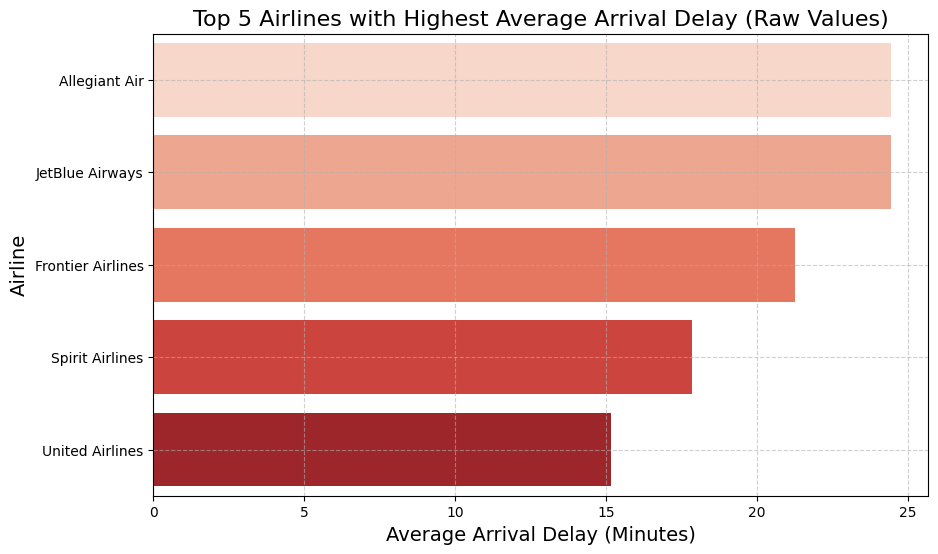

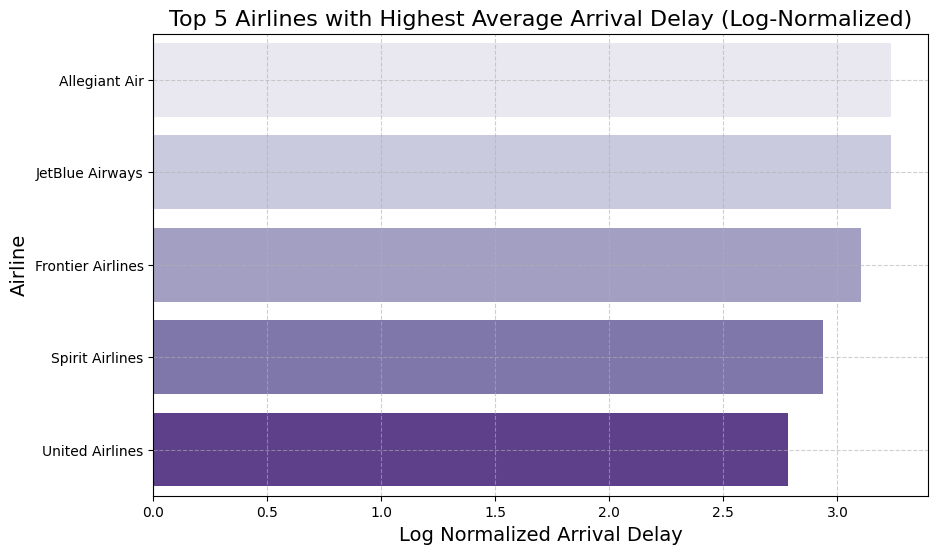

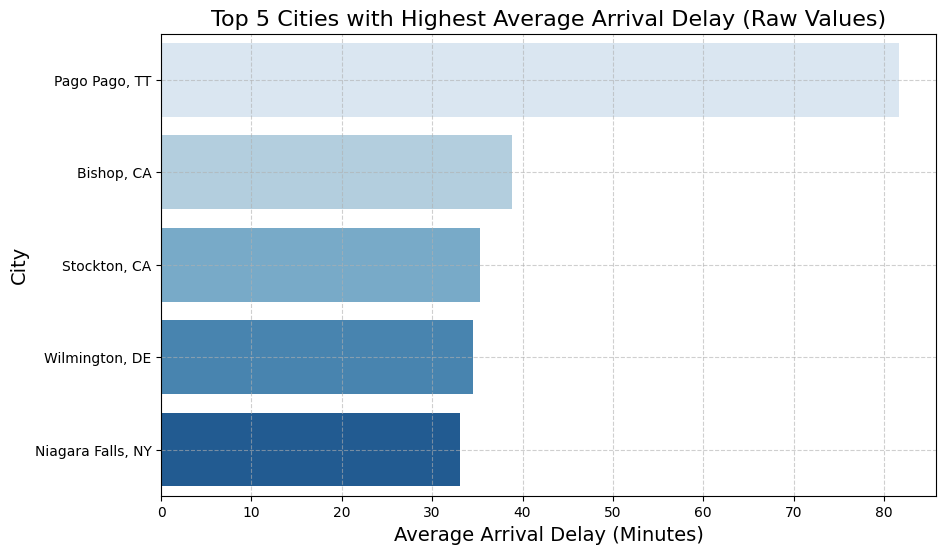

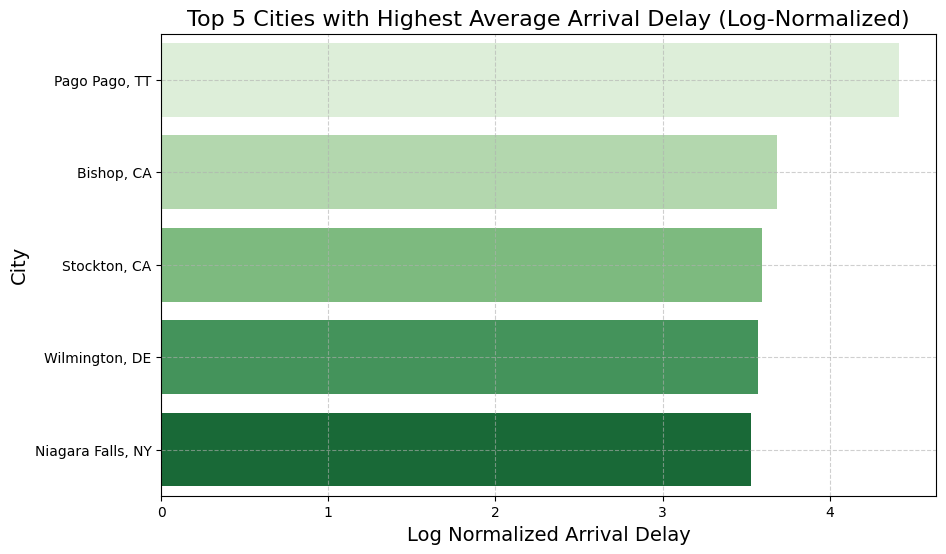

In [63]:
# Combine results into a DataFrame for visualization
df_top_5 = pd.DataFrame({
    "Airline": top_5_airlines.index,
    "Mean_Arrival_Delay": top_5_airlines.values
}).set_index("Airline")

df_top_5_cities = pd.DataFrame({
    "City": top_5_cities.index,
    "Mean_Arrival_Delay": top_5_cities.values
}).set_index("City")

# Step 3: Log Normalize the Delay Values
df_top_5["Log_Normalized_Arrival_Delay"] = np.log1p(df_top_5["Mean_Arrival_Delay"])
df_top_5_cities["Log_Normalized_Arrival_Delay"] = np.log1p(df_top_5_cities["Mean_Arrival_Delay"])

# Step 4: Plot Raw Arrival Delays (Airlines)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_5, y=df_top_5.index, x="Mean_Arrival_Delay", palette="Reds")
plt.title("Top 5 Airlines with Highest Average Arrival Delay (Raw Values)", fontsize=16)
plt.xlabel("Average Arrival Delay (Minutes)", fontsize=14)
plt.ylabel("Airline", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Step 5: Plot Log-Normalized Arrival Delays (Airlines)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_5, y=df_top_5.index, x="Log_Normalized_Arrival_Delay", palette="Purples")
plt.title("Top 5 Airlines with Highest Average Arrival Delay (Log-Normalized)", fontsize=16)
plt.xlabel("Log Normalized Arrival Delay", fontsize=14)
plt.ylabel("Airline", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Step 6: Plot Raw Arrival Delays (Cities)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_5_cities, y=df_top_5_cities.index, x="Mean_Arrival_Delay", palette="Blues")
plt.title("Top 5 Cities with Highest Average Arrival Delay (Raw Values)", fontsize=16)
plt.xlabel("Average Arrival Delay (Minutes)", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Step 7: Plot Log-Normalized Arrival Delays (Cities)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_5_cities, y=df_top_5_cities.index, x="Log_Normalized_Arrival_Delay", palette="Greens")
plt.title("Top 5 Cities with Highest Average Arrival Delay (Log-Normalized)", fontsize=16)
plt.xlabel("Log Normalized Arrival Delay", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
